<a href="https://colab.research.google.com/github/paola-rodrigues/Projeto_IFPE_Predicao_preco_de_vendas/blob/main/Predi%C3%A7%C3%A3o_pre%C3%A7o_de_vendas_Projeto_IFPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disciplina: Aprendizado de máquina

Discentes: Paola do Nascimento Rodrigues


---
# PROJETO PREDIÇÃO PREÇO DE VENDAS 📈
---

1.     Carregar o conjunto de dados usando a biblioteca Pandas.
2.     Verificar e adotar a estratégia adequada para tratar possíveis dados ausentes no conjunto de dados.
3.     Realizar a análise exploratória de cada um dos atributos preditores do conjunto de dados plotando os gráficos adequados, conforma nós estudamos.
4.     Realizar a divisão adequada do conjunto de dados em dois subconjuntos: treinamento e testes, realizando a estratificação quando se tratar de problemas de classificação.
5.     Escolher pelo menos três algoritmos de classificação ou regressão, a depender do problema que se está resolvendo. (Para verificar os algoritmos disponíveis verificar em: https://scikit-learn.org/stable/supervised_learning.html)
6.     Dividir o conjunto de treinamento em dois subconjuntos: treinamento e validação, para fazer otimização de hiperparâmetros.
7.      Utilizar Otimização bayesiana para otimizar os hiperparâmetros.
8.     Comparar o erro/acurácia do modelos gerados com e sem a otimização de hiperparâmetros.

# Dicionário dos dados


1.  Car_Name = nome do carro,
2.  Year = ano,
3.  Selling_Price = preço de venda,
4.  Present_Price = presente preço,
5.  Kms_Driven == km_percorridos,
6.  Fuel_Type == combustível_tipo,
7.  Seller_Type == vendedor_tipo,
8.  Transmission == transmissão,
9.  Owner == propritário,






In [ ]:
pip install feature-engine

# 1- Carregar o conjunto de dados usando a biblioteca Pandas.

In [ ]:
# Importando bibliotecas que serão utilizadas para análise e modelagem

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
from feature_engine.imputation import DropMissingData
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#Lendo a base de dados
df_car1 = pd.read_csv('car data.csv')
df_car2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df_car3 = pd.read_csv('Car details v3.csv')
df_car4 = pd.read_csv('car details v4.csv')



# Quantidade de linhas e colunas dos dataset

In [ ]:
#quantidade de linhas e colunas

print('1º base de dados tem ', df_car1.shape[0] , 'linhas e ', df_car1.shape[1], 'colunas.')
print('2º base de dados tem ', df_car2.shape[0] , 'linhas e ', df_car2.shape[1], 'colunas.')
print('3º base de dados tem ', df_car3.shape[0] , 'linhas e ', df_car3.shape[1], 'colunas.')
print('4º base de dados tem ', df_car4.shape[0] , 'linhas e ', df_car4.shape[1], 'colunas.')


1º base de dados tem  301 linhas e  9 colunas.
2º base de dados tem  4340 linhas e  8 colunas.
3º base de dados tem  8128 linhas e  13 colunas.
4º base de dados tem  2059 linhas e  20 colunas.


In [ ]:
print("Colunas Dataset 1º:",df_car1.columns)
print("\nColunas Dataset 2º:",df_car2.columns)
print("\nColunas Dataset 3º:",df_car3.columns)
print("\nColunas Dataset 4º:",df_car4.columns)

Colunas Dataset 1º: Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Colunas Dataset 2º: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Colunas Dataset 3º: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Colunas Dataset 4º: Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


In [ ]:
np.unique(df_car1['Car_Name'])

array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
       'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
       'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
       'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
       'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
       'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
       'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
       'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
       'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
       'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
       'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',
       'Mahindr

In [ ]:
np.unique(df_car2['name'])

array(['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz',
       'Ambassador Grand 1800 ISZ MPFI PW CL', ...,
       'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic',
       'Volvo XC60 D5 Inscription'], dtype=object)

# Dataset 1º

In [ ]:
def divide_nome_carro(linha):
    carro_nome = linha['Car_Name']
    palavras = carro_nome.split()
    num_palavras = len(palavras)

    if num_palavras == 1:
        return [np.nan , palavras[0],np.nan ]
    elif num_palavras == 2:
        return [np.nan, palavras[0], palavras[1]]
    else:
        return [palavras[0], palavras[1], ' '.join(palavras[2:])]

df_car1[['make', 'model', 'variant']] = df_car1.apply(divide_nome_carro, axis=1, result_type='expand')

df_car1 = df_car1.reindex(columns=['make','model','variant','Year', 'Selling_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','mileage', 'engine', 'max_power', 'torque','seats'])

df_car1 = df_car1.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_car1.head(5)
##Visualizando o dataset as 5 primeiras linhas

,make,model,variant,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,mileage,engine,max_power,torque,seats
0,NaN,ritz,NaN,2014,3.35,27000,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
1,NaN,sx4,NaN,2013,4.75,43000,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
2,NaN,ciaz,NaN,2017,7.25,6900,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
3,NaN,wagon,r,2011,2.85,5200,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
4,NaN,swift,NaN,2014,4.60,42450,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Valor máximo:', df_car1['Selling_Price'].max())
print('Valor mínimo:', df_car1['Selling_Price'].min())

Valor máximo: 35.0
Valor mínimo: 0.1


In [ ]:
df_car1['Selling_Price'] = round((df_car1['Selling_Price']*1000000))

In [ ]:
print("Dataset 1: quantidade de linha e colunas: ",df_car1.shape)

Dataset 1: quantidade de linha e colunas:  (301, 15)


In [ ]:
# antes a mudação no dataFrame 1
df_car1.head(10)

,make,model,variant,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,mileage,engine,max_power,torque,seats
0,NaN,ritz,NaN,2014,3350000.0,27000,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
1,NaN,sx4,NaN,2013,4750000.0,43000,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
2,NaN,ciaz,NaN,2017,7250000.0,6900,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
3,NaN,wagon,r,2011,2850000.0,5200,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
4,NaN,swift,NaN,2014,4600000.0,42450,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
5,NaN,vitara,brezza,2018,9250000.0,2071,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
6,NaN,ciaz,NaN,2015,6750000.0,18796,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
7,NaN,s,cross,2015,6500000.0,33429,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
8,NaN,ciaz,NaN,2016,8750000.0,20273,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
9,NaN,ciaz,NaN,2015,7450000.0,42367,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN


# Dataset 2º

In [ ]:
df_car2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
print('Valor máximo:', df_car2['selling_price'].max())
print('Valor mínimo:', df_car2['selling_price'].min())

Valor máximo: 8900000
Valor mínimo: 20000


In [ ]:
def divide_nome_carro(linha):
    carro_nome = linha['name']
    palavras = carro_nome.split()
    num_palavras = len(palavras)

    if num_palavras == 1:
        return [np.nan, palavras[0], np.nan]
    elif num_palavras == 2:
        return [np.nan, palavras[0], palavras[1]]
    else:
        return [palavras[0], palavras[1], ' '.join(palavras[2:])]

df_car2[['make', 'model', 'variant']] = df_car2.apply(divide_nome_carro, axis=1, result_type='expand')

df_car2 = df_car2.reindex(columns=['make','model','variant','year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'])

df_car2 = df_car2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_car2.head(5)

,make,model,variant,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,maruti,800,ac,2007,60000,70000,petrol,individual,manual,first owner,NaN,NaN,NaN,NaN,NaN
1,maruti,wagon,r lxi minor,2007,135000,50000,petrol,individual,manual,first owner,NaN,NaN,NaN,NaN,NaN
2,hyundai,verna,1.6 sx,2012,600000,100000,diesel,individual,manual,first owner,NaN,NaN,NaN,NaN,NaN
3,datsun,redigo,t option,2017,250000,46000,petrol,individual,manual,first owner,NaN,NaN,NaN,NaN,NaN
4,honda,amaze,vx i-dtec,2014,450000,141000,diesel,individual,manual,second owner,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Dataset 2: quantidade de linha e colunas: ",df_car2.shape)

Dataset 2: quantidade de linha e colunas:  (4340, 15)


# Dataset 3º

In [ ]:
df_car3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
print('Valor máximo:', df_car3['selling_price'].max())
print('Valor mínimo:', df_car3['selling_price'].min())

Valor máximo: 10000000
Valor mínimo: 29999


In [ ]:
def divide_nome_carro(linha):
    carro_nome = linha['name']
    palavras = carro_nome.split()
    num_palavras = len(palavras)

    if num_palavras == 1:
        return [np.nan, palavras[0], np.nan]
    elif num_palavras == 2:
        return [np.nan, palavras[0], palavras[1]]
    else:
        return [palavras[0], palavras[1], ' '.join(palavras[2:])]

df_car3[['make', 'model', 'variant']] = df_car3.apply(divide_nome_carro, axis=1, result_type='expand')

df_car3 = df_car3.reindex(columns=['make','model','variant','year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'])

df_car3 = df_car3.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_car3.head(5)

,make,model,variant,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,maruti,swift,dzire vdi,2014,450000,145500,diesel,individual,manual,first owner,23.4 kmpl,1248 cc,74 bhp,190nm@ 2000rpm,5.0
1,skoda,rapid,1.5 tdi ambition,2014,370000,120000,diesel,individual,manual,second owner,21.14 kmpl,1498 cc,103.52 bhp,250nm@ 1500-2500rpm,5.0
2,honda,city,2017-2020 exi,2006,158000,140000,petrol,individual,manual,third owner,17.7 kmpl,1497 cc,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,hyundai,i20,sportz diesel,2010,225000,127000,diesel,individual,manual,first owner,23.0 kmpl,1396 cc,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,maruti,swift,vxi bsiii,2007,130000,120000,petrol,individual,manual,first owner,16.1 kmpl,1298 cc,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
print("Dataset 3: quantidade de linha e colunas: ",df_car3.shape)

Dataset 3: quantidade de linha e colunas:  (8128, 15)


# Dataset 4°

In [ ]:
df_car4.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
print('Valor máximo:', df_car4['Price'].max())
print('Valor mínimo:', df_car4['Price'].min())

Valor máximo: 35000000
Valor mínimo: 49000


In [ ]:
df_car4[['Model',	'variant']] = df_car4['Model'].str.split(" ",1,expand=True)

df_car4 = df_car4.reindex(columns=['Make', 'Model','variant','Year','Price','Kilometer', 'Fuel Type','Seller Type',
                     'Transmission','Owner', 'mileage','Engine','Max Power', 'Max Torque','Seating Capacity'])

df_car4 = df_car4.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_car4.head(5)

,Make,Model,variant,Year,Price,Kilometer,Fuel Type,Seller Type,Transmission,Owner,mileage,Engine,Max Power,Max Torque,Seating Capacity
0,honda,amaze,1.2 vx i-vtec,2017,505000,87150,petrol,corporate,manual,first,NaN,1198 cc,87 bhp @ 6000 rpm,109 nm @ 4500 rpm,5.0
1,maruti suzuki,swift,dzire vdi,2014,450000,75000,diesel,individual,manual,second,NaN,1248 cc,74 bhp @ 4000 rpm,190 nm @ 2000 rpm,5.0
2,hyundai,i10,magna 1.2 kappa2,2011,220000,67000,petrol,individual,manual,first,NaN,1197 cc,79 bhp @ 6000 rpm,112.7619 nm @ 4000 rpm,5.0
3,toyota,glanza,g,2019,799000,37500,petrol,individual,manual,first,NaN,1197 cc,82 bhp @ 6000 rpm,113 nm @ 4200 rpm,5.0
4,toyota,innova,2.4 vx 7 str [2016-2020],2018,1950000,69000,diesel,individual,manual,first,NaN,2393 cc,148 bhp @ 3400 rpm,343 nm @ 1400 rpm,7.0


In [ ]:
df_car2.columns = df_car3.columns
df_car4.columns = df_car3.columns
df_car1.columns = df_car3.columns

# Concatenar vários DataFrames em um único DataFrame

In [ ]:
# concatenar os DataFrames em um único DataFrame chamado df_car
df_car = pd.concat([df_car1, df_car2, df_car3, df_car4], ignore_index=True,sort=False)

In [ ]:
# Obtendo a dimensão do DataFrame
num_linhas, num_colunas = df_car.shape

# Exibindo o número de linhas e colunas
print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

Número de linhas: 14828
Número de colunas: 15


# ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
print('A base de dados tem ', df_car.shape[0] , 'linhas e ', df_car.shape[1], 'colunas.')

A base de dados tem  14828 linhas e  15 colunas.


In [ ]:
# Aqui verificamos quais as features, obesevadas os tipos delas(numéricas ou categórica) e se precisam de algum pré-processamento:
#Tipo das variáveis
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           14610 non-null  object 
 1   model          14828 non-null  object 
 2   variant        14676 non-null  object 
 3   year           14828 non-null  int64  
 4   selling_price  14828 non-null  float64
 5   km_driven      14828 non-null  int64  
 6   fuel           14828 non-null  object 
 7   seller_type    14828 non-null  object 
 8   transmission   14828 non-null  object 
 9   owner          14828 non-null  object 
 10  mileage        7907 non-null   object 
 11  engine         9886 non-null   object 
 12  max_power      9892 non-null   object 
 13  torque         9885 non-null   object 
 14  seats          9902 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [ ]:
df_car.dtypes

make              object
model             object
variant           object
year               int64
selling_price    float64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [ ]:
# Visualizar as primeiras linhas do conjunto de dados
df_car.head()

,make,model,variant,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,NaN,ritz,NaN,2014,3350000.0,27000,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
1,NaN,sx4,NaN,2013,4750000.0,43000,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
2,NaN,ciaz,NaN,2017,7250000.0,6900,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
3,NaN,wagon,r,2011,2850000.0,5200,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
4,NaN,swift,NaN,2014,4600000.0,42450,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Renomeando as colunas
df_car.columns = ['Marca', 'Modelo', 'Serie_car', 'Ano',
                 'Preço_de_venda', 'km_driven','Combustível',
                  'Vendedor_tipo', 'Transmissao', 'Proprietario',
                  'Quilometragem', 'Motor','Poder_maximo',
                  'Torque','Assentos']

In [ ]:
# Verificando valores únicos na coluna proprietário
df_car['Proprietario'].unique()

array([0, 1, 3, 'first owner', 'second owner', 'fourth & above owner',
       'third owner', 'test drive car', 'first', 'second', 'third',
       'fourth', 'unregistered car', '4 or more'], dtype=object)

In [ ]:
# Verificando valores únicos na coluna transmissão
df_car['Transmissao'].unique()

array(['manual', 'automatic'], dtype=object)

In [ ]:
df_car['Vendedor_tipo'].unique()

array(['dealer', 'individual', 'trustmark dealer', 'corporate',
       'commercial registration'], dtype=object)

In [ ]:
df_car['Combustível'].unique()

array(['petrol', 'diesel', 'cng', 'lpg', 'electric', 'cng + cng',
       'hybrid', 'petrol + cng', 'petrol + lpg'], dtype=object)

In [ ]:
df_car['Ano'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007, 2019, 1996, 1998, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992, 1983, 1994, 1991, 2021, 2022, 1988])

 1 cng- Gás Natural Veicular

2 petrol- gasolina

 3 diesel -diesel

 4 lpg-  Gás Liquefeito de Petróleo

 5 eletric - eletrico

 6 hybrid -  gasolina, álcool

 7 petrol + cng = gasolina e gás natural

 8 petrol + lpg = gasolina e gás petróleo



In [ ]:
df_car['Marca'].unique()

array([nan, 'royal', 'um', 'bajaj', 'ktm', 'mahindra', 'honda', 'yamaha',
       'tvs', 'hero', 'suzuki', 'maruti', 'hyundai', 'datsun', 'tata',
       'chevrolet', 'toyota', 'jaguar', 'mercedes-benz', 'audi', 'skoda',
       'jeep', 'bmw', 'ford', 'nissan', 'renault', 'fiat', 'volkswagen',
       'volvo', 'mitsubishi', 'land', 'daewoo', 'mg', 'force', 'isuzu',
       'ambassador', 'kia', 'opelcorsa', 'lexus', 'ashok', 'opel',
       'peugeot', 'maruti suzuki', 'porsche', 'land rover', 'maserati',
       'mini', 'ferrari', 'lamborghini', 'ssangyong', 'rolls-royce'],
      dtype=object)

In [ ]:
len(df_car['Marca'].unique())

51

In [ ]:
df_car['Modelo'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'enfield',
       'renegade', 'ktm', 'dominar', 'hyosung', '390', 'mojo', 'pulsar',
       'avenger', 'cb', 'fz', 'apache', 'cbr', 'hero', 'passion',
       'yamaha', 'activa', 'tvs', 'dream', 'splender', 'honda',
       'discover', 'access', 'super', 'ignitor', 'cbz', 'ct', 'i20',
       'grand', 'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna',
       'city', 'brio', 'amaze', 'jazz', 'redigo', 'indigo', 'celerio',
       'sail', 'venue', 'enjoy', 'xf', 'new', 'q5', 'tigor', 'a6',
       'superb', 'compass', 'e-class', '3', 'q7', 'scorpio', 'santro',
       'eeco', 'jeep', 'indica', 'tavera', 'ecosport', 'civic', 'rapid',
       'getz', 'terrano', 'elite', 's-class', 'xuv500', 'duster',
       'bolero', 'avventura', 'a8', 'jetta', 'a4', 'x1', 'v40', '7',
       'sonata', 'micra', 'xylo', '

In [ ]:
# Visualizar as primeiras linhas do conjunto de dados
df_car.head()

,Marca,Modelo,Serie_car,Ano,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Quilometragem,Motor,Poder_maximo,Torque,Assentos
0,NaN,ritz,NaN,2014,3350000.0,27000,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
1,NaN,sx4,NaN,2013,4750000.0,43000,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
2,NaN,ciaz,NaN,2017,7250000.0,6900,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
3,NaN,wagon,r,2011,2850000.0,5200,petrol,dealer,manual,0,NaN,NaN,NaN,NaN,NaN
4,NaN,swift,NaN,2014,4600000.0,42450,diesel,dealer,manual,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verificando se existem valores faltantes nos dados
df_car.isna().any()

Marca              True
Modelo            False
Serie_car          True
Ano               False
Preço_de_venda    False
km_driven         False
Combustível       False
Vendedor_tipo     False
Transmissao       False
Proprietario      False
Quilometragem      True
Motor              True
Poder_maximo       True
Torque             True
Assentos           True
dtype: bool

In [ ]:
# Verificando quantos valores faltantes existem nos dados
df_car.isna().sum()

Marca              218
Modelo               0
Serie_car          152
Ano                  0
Preço_de_venda       0
km_driven            0
Combustível          0
Vendedor_tipo        0
Transmissao          0
Proprietario         0
Quilometragem     6921
Motor             4942
Poder_maximo      4936
Torque            4943
Assentos          4926
dtype: int64

In [ ]:
print(f'Porcentagem de dados faltantes:\n{df_car.isnull().mean() * 100}')

Porcentagem de dados faltantes:
Marca              1.470192
Modelo             0.000000
Serie_car          1.025088
Ano                0.000000
Preço_de_venda     0.000000
km_driven          0.000000
Combustível        0.000000
Vendedor_tipo      0.000000
Transmissao        0.000000
Proprietario       0.000000
Quilometragem     46.675209
Motor             33.328837
Poder_maximo      33.288373
Torque            33.335581
Assentos          33.220933
dtype: float64


**Foi realizado uma análise dos dados faltantes e realizamos a decisão de descartar algumas colunas que foram: Quilometragem,  Motor, Poder_maximo, Torque, Assentos**

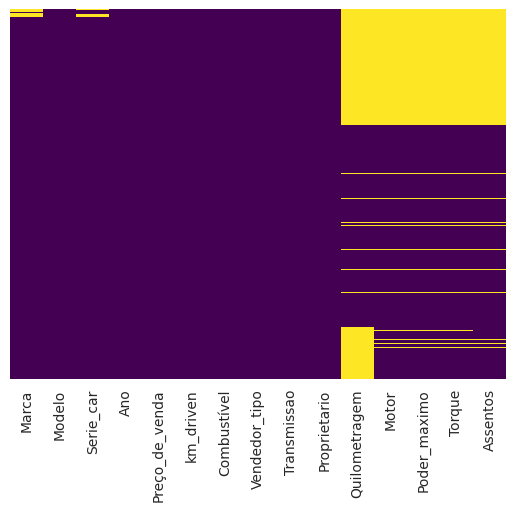

In [ ]:
sns.heatmap(df_car.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [ ]:
# Estatística descritiva de todas as colunas do DataFrame
df_car.describe(include = 'all')

,Marca,Modelo,Serie_car,Ano,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Quilometragem,Motor,Poder_maximo,Torque,Assentos
count,14610,14828,14676,14828.000000,1.482800e+04,1.482800e+04,14828,14828,14828,14828,7907,9886,9892,9885,9902.000000
unique,50,307,3158,NaN,NaN,NaN,9,5,2,14,393,146,657,718,NaN
top,maruti,swift,dzire vdi,NaN,NaN,NaN,diesel,individual,manual,first owner,18.9 kmpl,1248 cc,74 bhp,190nm@ 2000rpm,NaN
freq,3728,1204,257,NaN,NaN,NaN,7664,12113,12364,8121,225,1139,377,530,NaN
mean,NaN,NaN,NaN,2013.955692,8.285201e+05,6.593197e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.394466
std,NaN,NaN,NaN,4.121330,1.498278e+06,5.404873e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934542
min,NaN,NaN,NaN,1983.000000,2.000000e+04,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,2012.000000,2.600000e+05,3.200000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,NaN,2015.000000,4.599990e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,2017.000000,7.500000e+05,9.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


# 2-     Verificar e adotar a estratégia adequada para tratar possíveis dados ausentes no conjunto de dados.

#Removendo observações com dados ausentes

Drop colunas com grande valores ausentes e colunas informações irrelevantes para essa primeira análise.

In [ ]:
df_car.drop(['Modelo', 'Serie_car','Quilometragem', 'Motor', 'Poder_maximo', 'Torque', 'Assentos'],axis=1,inplace=True)

In [ ]:
df_car.head()

,Marca,Ano,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario
0,NaN,2014,3350000.0,27000,petrol,dealer,manual,0
1,NaN,2013,4750000.0,43000,diesel,dealer,manual,0
2,NaN,2017,7250000.0,6900,petrol,dealer,manual,0
3,NaN,2011,2850000.0,5200,petrol,dealer,manual,0
4,NaN,2014,4600000.0,42450,diesel,dealer,manual,0


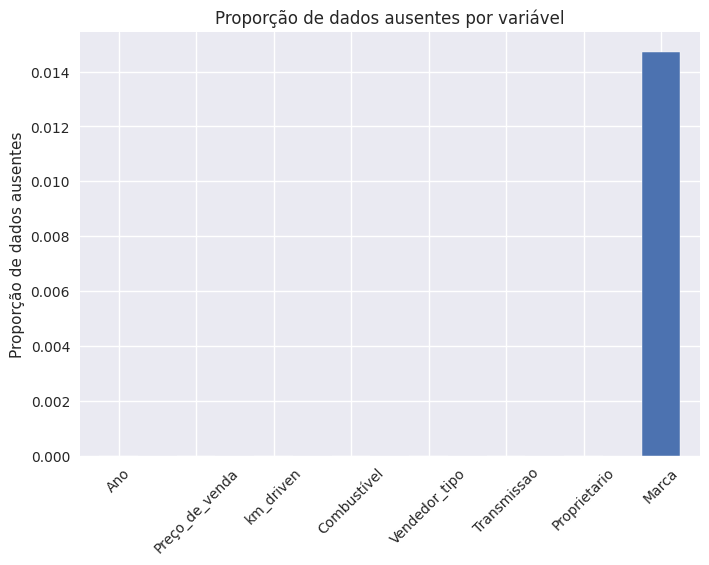

In [ ]:
#Encontrar a proporção de dados ausentes e realizamos um gráfico de barras
with plt.style.context('seaborn'):
    df_car.isnull().mean().sort_values(ascending=True).plot.bar(rot=45)
    plt.ylabel("Proporção de dados ausentes")
    plt.title("Proporção de dados ausentes por variável")

Para apagar observações utlizando a biblioteca feature-engine,vamos importar o Transformer, Configuramos o imputer para encontrar os valores ausentes de forma automática.

In [ ]:
cca = DropMissingData(variables=None, missing_only=True)

Fazemos o transformer identidicar os valores ausentes nos dados

In [ ]:
cca.fit(df_car)

DropMissingData()

In [ ]:
cca.variables_

['Marca']

Removemos as observações com dados ausentes



In [ ]:
df_car_cca = cca.transform(df_car)

In [ ]:
df_car_cca.isnull().sum()

Marca             0
Ano               0
Preço_de_venda    0
km_driven         0
Combustível       0
Vendedor_tipo     0
Transmissao       0
Proprietario      0
dtype: int64

In [ ]:
df_car_cca.head()

,Marca,Ano,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario
100,royal,2016,1750000.0,3000,petrol,individual,manual,0
101,um,2017,1700000.0,1400,petrol,individual,manual,0
103,bajaj,2017,1450000.0,1200,petrol,individual,manual,0
104,royal,2017,1350000.0,4100,petrol,individual,manual,0
107,royal,2013,1250000.0,15000,petrol,individual,manual,0


In [ ]:
num_linhas, num_colunas = df_car_cca.shape

# Exibindo o número de linhas e colunas
print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

Número de linhas: 14610
Número de colunas: 8


In [ ]:
df_car_cca['Marca'].unique()

array(['royal', 'um', 'bajaj', 'ktm', 'mahindra', 'honda', 'yamaha',
       'tvs', 'hero', 'suzuki', 'maruti', 'hyundai', 'datsun', 'tata',
       'chevrolet', 'toyota', 'jaguar', 'mercedes-benz', 'audi', 'skoda',
       'jeep', 'bmw', 'ford', 'nissan', 'renault', 'fiat', 'volkswagen',
       'volvo', 'mitsubishi', 'land', 'daewoo', 'mg', 'force', 'isuzu',
       'ambassador', 'kia', 'opelcorsa', 'lexus', 'ashok', 'opel',
       'peugeot', 'maruti suzuki', 'porsche', 'land rover', 'maserati',
       'mini', 'ferrari', 'lamborghini', 'ssangyong', 'rolls-royce'],
      dtype=object)

In [ ]:
# correção modelo ssangyong está na marca mahindra
indx_dup_Mahindra = df_car_cca[df_car_cca['Marca'] == 'ssangyong'].index

df_car_cca.loc[indx_dup_Mahindra,'Marca'] = 'mahindra'

In [ ]:
# correção de nome duplicados

indx_dup_maruti = df_car_cca[(df_car_cca['Marca'] == 'maruti') | (df_car_cca['Marca'] == 'maruti suzuki')].index

# Substituindo valores de índice
df_car_cca.loc[indx_dup_maruti,'Marca'] = 'maruti'

In [ ]:
indx_dup_land = df_car_cca[(df_car_cca['Marca'] == 'land') | (df_car_cca['Marca'] == 'land rover')].index

# Substituindo valores de índice
df_car_cca.loc[indx_dup_land,'Marca'] = 'land rover'

In [ ]:
# correção modelo está na marca opel
indx_dup_Opel = df_car_cca[df_car_cca['Marca'] == 'opelcorsa'].index

df_car_cca.loc[indx_dup_Opel,'Marca'] = 'opel'

In [ ]:
df_car_cca['Marca'].unique()

array(['royal', 'um', 'bajaj', 'ktm', 'mahindra', 'honda', 'yamaha',
       'tvs', 'hero', 'suzuki', 'maruti', 'hyundai', 'datsun', 'tata',
       'chevrolet', 'toyota', 'jaguar', 'mercedes-benz', 'audi', 'skoda',
       'jeep', 'bmw', 'ford', 'nissan', 'renault', 'fiat', 'volkswagen',
       'volvo', 'mitsubishi', 'land rover', 'daewoo', 'mg', 'force',
       'isuzu', 'ambassador', 'kia', 'opel', 'lexus', 'ashok', 'peugeot',
       'porsche', 'maserati', 'mini', 'ferrari', 'lamborghini',
       'rolls-royce'], dtype=object)

In [ ]:
len(df_car_cca['Marca'].unique())

46

In [ ]:
df_car_cca['Marca'].value_counts()

maruti           4168
hyundai          2585
mahindra         1260
tata             1152
honda             892
toyota            826
ford              683
chevrolet         425
renault           417
volkswagen        343
bmw               280
mercedes-benz     260
audi              227
skoda             213
nissan            161
datsun            110
jaguar             94
volvo              87
fiat               86
jeep               52
land rover         44
lexus              40
kia                28
bajaj              25
mitsubishi         24
mg                 22
royal              17
porsche            15
hero               11
mini               11
isuzu               8
ambassador          8
force               7
yamaha              7
tvs                 5
daewoo              4
rolls-royce         3
opel                2
ashok               1
peugeot             1
ktm                 1
maserati            1
suzuki              1
ferrari             1
lamborghini         1
um        

 1 cng- Gás Natural Veicular

2 petrol- gasolina

 3 diesel -diesel

 4 lpg-  Gás Liquefeito de Petróleo

 5 eletric - eletrico

 6 hybrid -  gasolina, álcool

 7 petrol + cng = gasolina e gás natural

 8 petrol + lpg = gasolina e gás petróleo


In [ ]:
df_car_cca['km_driven'].value_counts()

120000     762
70000      718
80000      696
60000      653
50000      644
          ... 
93468        1
16830        1
120005       1
1500000      1
60474        1
Name: km_driven, Length: 2077, dtype: int64

In [ ]:
df_car_cca.head()

,Marca,Ano,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario
100,royal,2016,1750000.0,3000,petrol,individual,manual,0
101,um,2017,1700000.0,1400,petrol,individual,manual,0
103,bajaj,2017,1450000.0,1200,petrol,individual,manual,0
104,royal,2017,1350000.0,4100,petrol,individual,manual,0
107,royal,2013,1250000.0,15000,petrol,individual,manual,0


In [ ]:
num_linhas, num_colunas = df_car_cca.shape

# Exibindo o número de linhas e colunas
print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

Número de linhas: 14610
Número de colunas: 8


In [ ]:
df_car_cca['Combustível'].unique()

array(['petrol', 'diesel', 'cng', 'lpg', 'electric', 'cng + cng',
       'hybrid', 'petrol + cng', 'petrol + lpg'], dtype=object)

In [ ]:
df_car_cca.head()

,Marca,Ano,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario
100,royal,2016,1750000.0,3000,petrol,individual,manual,0
101,um,2017,1700000.0,1400,petrol,individual,manual,0
103,bajaj,2017,1450000.0,1200,petrol,individual,manual,0
104,royal,2017,1350000.0,4100,petrol,individual,manual,0
107,royal,2013,1250000.0,15000,petrol,individual,manual,0


In [ ]:
df_car_cca['Ano'].unique()

array([2016, 2017, 2013, 2014, 2015, 2011, 2012, 2009, 2010, 2008, 2005,
       2007, 2006, 2018, 2019, 1996, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992, 1983, 1994, 1991, 2021, 2022, 1988])

In [ ]:
df_car_cca['Preço_de_venda'].unique()

array([1750000., 1700000., 1450000., ..., 1639999., 2765000., 4290000.])

In [ ]:
len(df_car_cca['Preço_de_venda'].unique())

1061

In [ ]:
len(df_car_cca['Vendedor_tipo'].unique())

5

In [ ]:
df_car_cca['Ano_atual']= 2023

In [ ]:
df_car_cca.head()

,Marca,Ano,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Ano_atual
100,royal,2016,1750000.0,3000,petrol,individual,manual,0,2023
101,um,2017,1700000.0,1400,petrol,individual,manual,0,2023
103,bajaj,2017,1450000.0,1200,petrol,individual,manual,0,2023
104,royal,2017,1350000.0,4100,petrol,individual,manual,0,2023
107,royal,2013,1250000.0,15000,petrol,individual,manual,0,2023


In [ ]:
df_car_cca['Idade_veiculo']= df_car_cca['Ano_atual']-df_car_cca['Ano']

In [ ]:
df_car_cca.drop(['Ano_atual', 'Ano'],axis=1,inplace=True)

In [ ]:
df_car_cca.head()

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
100,royal,1750000.0,3000,petrol,individual,manual,0,7
101,um,1700000.0,1400,petrol,individual,manual,0,6
103,bajaj,1450000.0,1200,petrol,individual,manual,0,6
104,royal,1350000.0,4100,petrol,individual,manual,0,6
107,royal,1250000.0,15000,petrol,individual,manual,0,10


In [ ]:
df_car_cca['Proprietario'].unique()

array([0, 1, 'first owner', 'second owner', 'fourth & above owner',
       'third owner', 'test drive car', 'first', 'second', 'third',
       'fourth', 'unregistered car', '4 or more'], dtype=object)

In [ ]:
# correção número de proprietário do veiculo
indx_dup_Zero = df_car_cca[(df_car_cca['Proprietario'] == 'unregistered car')  | (df_car_cca['Proprietario'] == 'test drive car') | (df_car_cca['Proprietario'] == 0) ].index

df_car_cca.loc[indx_dup_Zero,'Proprietario'] = '0'

In [ ]:
# correção número de proprietário do veiculo 1
indx_dup_primeiro = df_car_cca[(df_car_cca['Proprietario'] == 'first owner')  | (df_car_cca['Proprietario'] == 'first')  | (df_car_cca['Proprietario'] == 1)].index

df_car_cca.loc[indx_dup_primeiro,'Proprietario'] = '1'

In [ ]:
# correção número de proprietário do veiculo 2
indx_dup_segundo = df_car_cca[(df_car_cca['Proprietario'] == 'second owner')  | (df_car_cca['Proprietario'] == 'second')].index

df_car_cca.loc[indx_dup_segundo,'Proprietario'] = '2'

In [ ]:
# correção número de proprietário do veiculo 3
indx_dup_terceiro = df_car_cca[(df_car_cca['Proprietario'] == 'third owner')  | (df_car_cca['Proprietario'] == 'third')].index

df_car_cca.loc[indx_dup_terceiro,'Proprietario'] = '3'

In [ ]:
# correção número de proprietário do veiculo 4
indx_dup_quarto = df_car_cca[(df_car_cca['Proprietario'] == 'fourth & above owner')  | (df_car_cca['Proprietario'] == 'fourth') | (df_car_cca['Proprietario'] == '4 or more')].index

df_car_cca.loc[indx_dup_quarto,'Proprietario'] = '4'

In [ ]:
df_car_cca['Proprietario'].unique()

array(['0', '1', '2', '4', '3'], dtype=object)

In [ ]:
df_car_cca.head()

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
100,royal,1750000.0,3000,petrol,individual,manual,0,7
101,um,1700000.0,1400,petrol,individual,manual,0,6
103,bajaj,1450000.0,1200,petrol,individual,manual,0,6
104,royal,1350000.0,4100,petrol,individual,manual,0,6
107,royal,1250000.0,15000,petrol,individual,manual,0,10


 1 cng- Gás Natural Veicular

2 petrol- gasolina

 3 diesel -diesel

 4 lpg-  Gás Liquefeito de Petróleo

 5 eletric - eletrico

 6 hybrid -  gasolina, álcool

 7 petrol + cng = gasolina e gás natural

 8 petrol + lpg = gasolina e gás petróleo

In [ ]:
df_car_cca['Combustível'].unique()

array(['petrol', 'diesel', 'cng', 'lpg', 'electric', 'cng + cng',
       'hybrid', 'petrol + cng', 'petrol + lpg'], dtype=object)

In [ ]:
# correção combustível do veiculo
indx_dup_combust = df_car_cca[(df_car_cca['Combustível'] == 'cng + cng')  |  (df_car_cca['Combustível'] =='cng')].index

df_car_cca.loc[indx_dup_combust,'Combustível'] = 'petrol + cng'

In [ ]:
# correção combustível do veiculo
indx_dup_combust = df_car_cca[(df_car_cca['Combustível'] == 'lpg')].index

df_car_cca.loc[indx_dup_combust,'Combustível'] = 'petrol + lpg'

In [ ]:
df_car_cca.head()

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
100,royal,1750000.0,3000,petrol,individual,manual,0,7
101,um,1700000.0,1400,petrol,individual,manual,0,6
103,bajaj,1450000.0,1200,petrol,individual,manual,0,6
104,royal,1350000.0,4100,petrol,individual,manual,0,6
107,royal,1250000.0,15000,petrol,individual,manual,0,10


# 3-     Realizar a análise exploratória de cada um dos atributos preditores do conjunto de dados plotando os gráficos adequados, conforma nós estudamos.

# A idade do veículo influencia no preço de venda ?

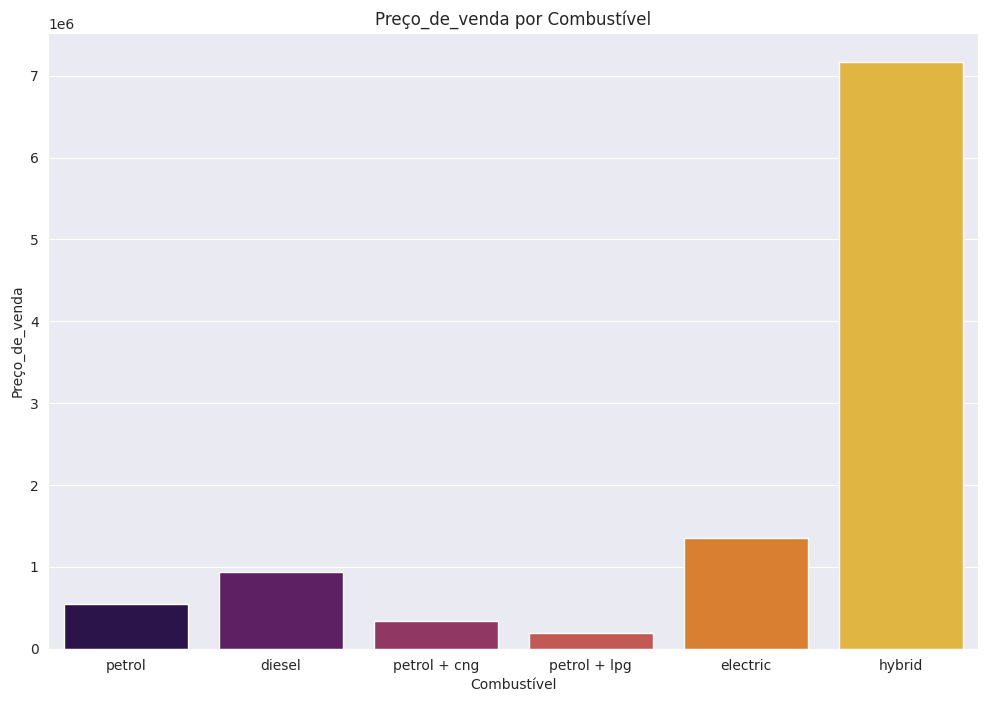

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Combustível', y='Preço_de_venda', data=df_car_cca, ci = None, palette='inferno').set_title("Preço_de_venda por Combustível");

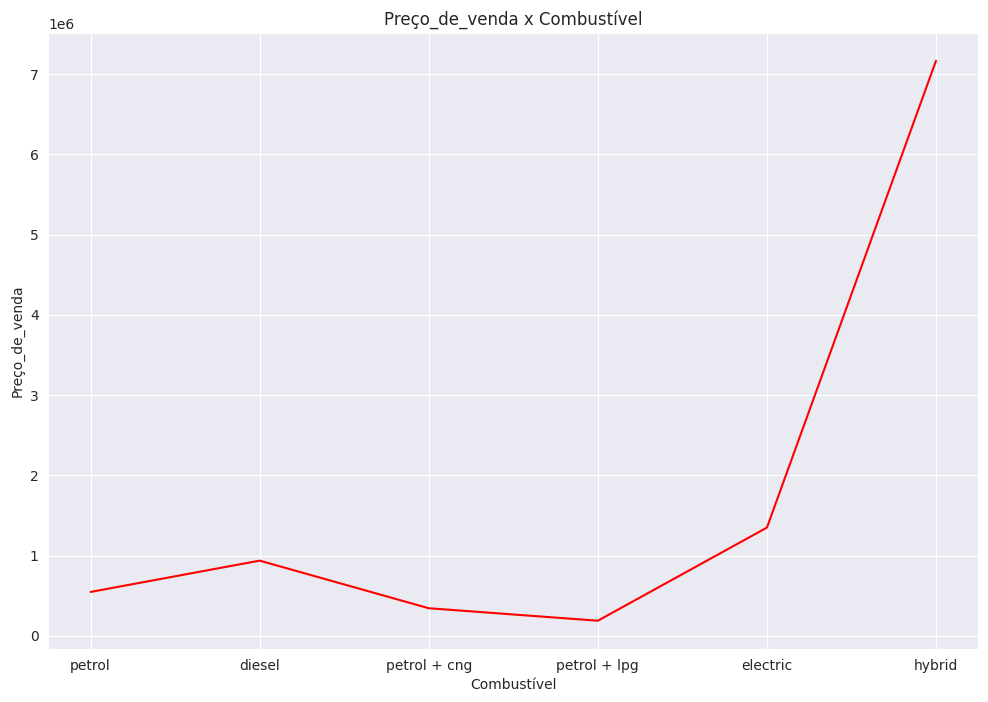

In [ ]:
# Ordena o DataFrame pela coluna 'Preço_de_venda' em ordem ascendente
df_car_cca_sorted = df_car_cca.sort_values(by='Preço_de_venda', ascending=True)

# Plota o gráfico de linha usando o DataFrame ordenado e a função lineplot do Seaborn
plt.figure(figsize=(12, 8))
_ = sns.lineplot(data=df_car_cca_sorted, x='Combustível', y='Preço_de_venda', color='red', ci=None)
plt.title("Preço_de_venda x Combustível")
plt.show()

# A quantidade de proprietario influencia no preço de venda ?

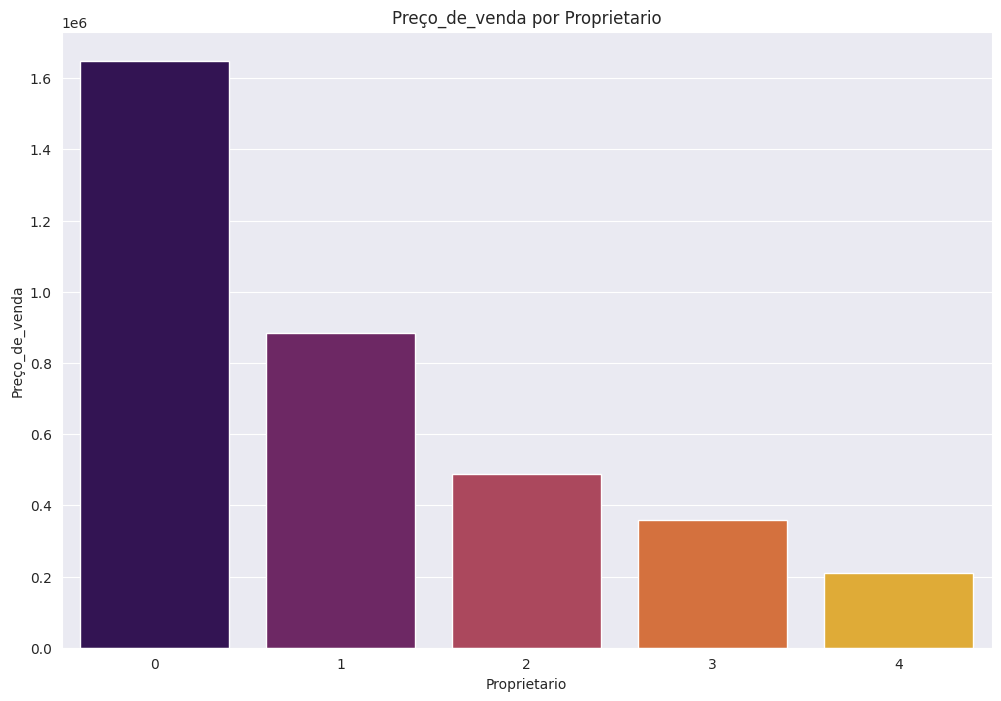

In [ ]:
# Ordena o DataFrame pela coluna 'Proprietario' em ordem ascendente
df_car_cca_sorted = df_car_cca.sort_values(by='Proprietario', ascending=True)

# Plota o gráfico de barras usando o DataFrame ordenado e a função barplot do Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Proprietario', y='Preço_de_venda', data=df_car_cca_sorted, ci=None, palette='inferno')
plt.title("Preço_de_venda por Proprietario")
plt.show()

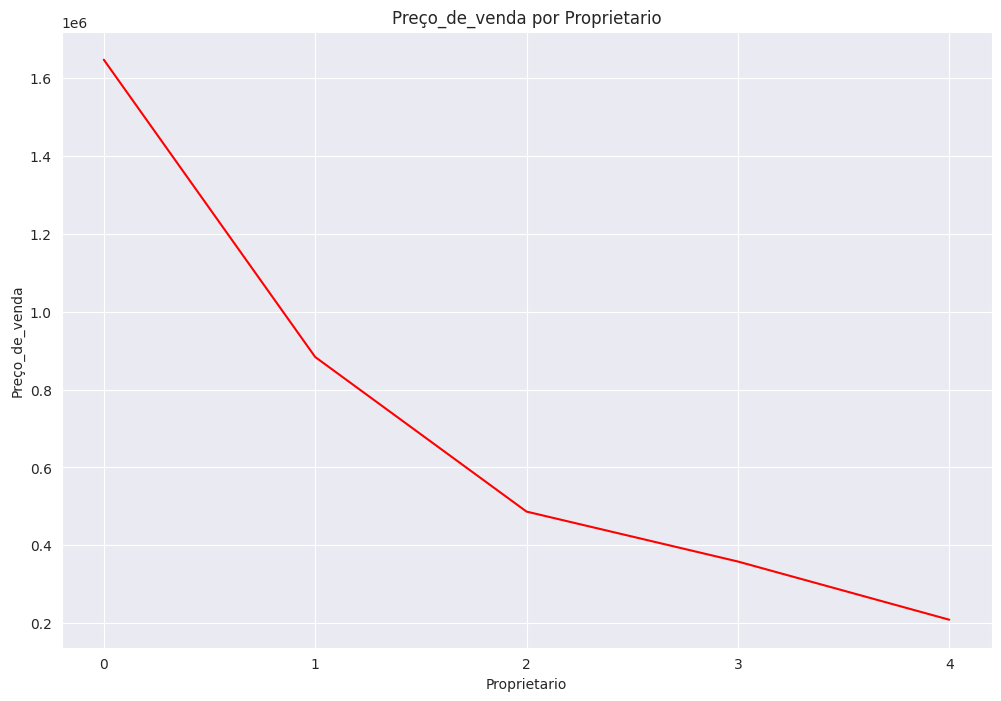

In [ ]:
# Ordena o DataFrame pela coluna 'Proprietario' em ordem ascendente
df_car_cca_sorted = df_car_cca.sort_values(by='Proprietario', ascending=True)

# Plota o gráfico de linha usando o DataFrame ordenado e a função lineplot do Seaborn
plt.figure(figsize=(12, 8))
_ = sns.lineplot(data=df_car_cca_sorted, x='Proprietario', y='Preço_de_venda', color='red', ci=None)
plt.title("Preço_de_venda por Proprietario")
plt.show()

No gráfico abaixo fica bem claro o problema quando o número zero, ademais, parece existir uma não existe uma correlação  forte entre km e preço de vendas.

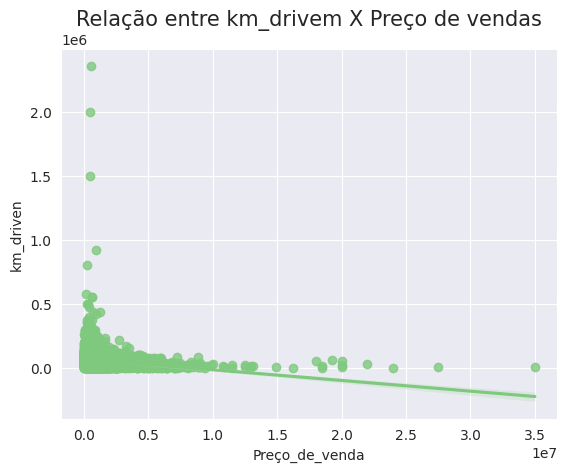

In [ ]:
sns.regplot(data = df_car_cca, x = 'Preço_de_venda', y = 'km_driven').set_title('Relação entre km_drivem X Preço de vendas', fontsize = 15)
plt.xlabel('Preço_de_venda')
plt.ylabel('km_driven');

In [ ]:
df_car_cca.head()

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
100,royal,1750000.0,3000,petrol,individual,manual,0,7
101,um,1700000.0,1400,petrol,individual,manual,0,6
103,bajaj,1450000.0,1200,petrol,individual,manual,0,6
104,royal,1350000.0,4100,petrol,individual,manual,0,6
107,royal,1250000.0,15000,petrol,individual,manual,0,10


In [ ]:
df_car_cca.dtypes

Marca              object
Preço_de_venda    float64
km_driven           int64
Combustível        object
Vendedor_tipo      object
Transmissao        object
Proprietario       object
Idade_veiculo       int64
dtype: object

In [ ]:
df_car_cca['Marca'] = df_car_cca['Marca'].astype('category').cat.codes
df_car_cca['Combustível'] = df_car_cca['Combustível'].astype('category').cat.codes
df_car_cca['Vendedor_tipo'] = df_car_cca['Vendedor_tipo'].astype('category').cat.codes
df_car_cca['Transmissao'] = df_car_cca['Transmissao'].astype('category').cat.codes
df_car_cca['Proprietario'] = df_car_cca['Proprietario'].astype('category').cat.codes
df_car_cca

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
100,36,1750000.0,3000,3,3,1,0,7
101,42,1700000.0,1400,3,3,1,0,6
103,3,1450000.0,1200,3,3,1,0,6
104,36,1350000.0,4100,3,3,1,0,6
107,36,1250000.0,15000,3,3,1,0,10
...,...,...,...,...,...,...,...,...
14823,23,850000.0,90300,0,3,1,1,7
14824,14,275000.0,83000,3,3,1,2,9
14825,11,240000.0,73000,3,3,1,1,10
14826,4,4290000.0,60474,0,3,0,1,5


In [ ]:
df_car_cca.dtypes

Marca                int8
Preço_de_venda    float64
km_driven           int64
Combustível          int8
Vendedor_tipo        int8
Transmissao          int8
Proprietario         int8
Idade_veiculo       int64
dtype: object

As informações estatística das colunas do dataset;

In [ ]:
df_car_cca.describe()

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
count,14610.000000,1.461000e+04,1.461000e+04,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000
mean,22.480630,7.485533e+05,6.627860e+04,1.456674,2.869199,0.833812,1.413210,9.037851
std,10.567247,1.199874e+06,5.412199e+04,1.527557,0.412104,0.372262,0.699023,4.135878
min,0.000000,2.000000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,2.509990e+05,3.300000e+04,0.000000,3.000000,1.000000,1.000000,6.000000
50%,24.000000,4.500000e+05,6.000000e+04,0.000000,3.000000,1.000000,1.000000,8.000000
75%,24.000000,7.250000e+05,9.000000e+04,3.000000,3.000000,1.000000,2.000000,11.000000
max,45.000000,3.500000e+07,2.360457e+06,5.000000,4.000000,1.000000,4.000000,40.000000


# Matriz de correlação

In [ ]:
# Calcular a matriz de correlação
df_car_cca.corr()

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
Marca,1.000000,-0.063572,0.110581,-0.114048,0.085438,0.079591,0.026044,0.029588
Preço_de_venda,-0.063572,1.000000,-0.185365,-0.167168,-0.136914,-0.542173,-0.177152,-0.365743
km_driven,0.110581,-0.185365,1.000000,-0.256080,0.099146,0.177654,0.290712,0.403672
Combustível,-0.114048,-0.167168,-0.256080,1.000000,0.073909,0.033681,-0.023907,0.070127
Vendedor_tipo,0.085438,-0.136914,0.099146,0.073909,1.000000,0.145645,0.139160,0.088769
Transmissao,0.079591,-0.542173,0.177654,0.033681,0.145645,1.000000,0.129493,0.258616
Proprietario,0.026044,-0.177152,0.290712,-0.023907,0.139160,0.129493,1.000000,0.489668
Idade_veiculo,0.029588,-0.365743,0.403672,0.070127,0.088769,0.258616,0.489668,1.000000


Abaixo matriz de correlação das entradas com a saída

In [ ]:
corr = df_car_cca.corr()
corr.style.background_gradient(cmap='RdBu', axis=None)

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo
Marca,1.000000,-0.063572,0.110581,-0.114048,0.085438,0.079591,0.026044,0.029588
Preço_de_venda,-0.063572,1.000000,-0.185365,-0.167168,-0.136914,-0.542173,-0.177152,-0.365743
km_driven,0.110581,-0.185365,1.000000,-0.256080,0.099146,0.177654,0.290712,0.403672
Combustível,-0.114048,-0.167168,-0.256080,1.000000,0.073909,0.033681,-0.023907,0.070127
Vendedor_tipo,0.085438,-0.136914,0.099146,0.073909,1.000000,0.145645,0.139160,0.088769
Transmissao,0.079591,-0.542173,0.177654,0.033681,0.145645,1.000000,0.129493,0.258616
Proprietario,0.026044,-0.177152,0.290712,-0.023907,0.139160,0.129493,1.000000,0.489668
Idade_veiculo,0.029588,-0.365743,0.403672,0.070127,0.088769,0.258616,0.489668,1.000000


Com base na correlação existe duas features redundantes com a variávek de saída, que é Ano e Idade_Veiculo. Poderia remover Idade do veiculo já foi inserida por mim.

Exitem feature com correlações relativamente fortes

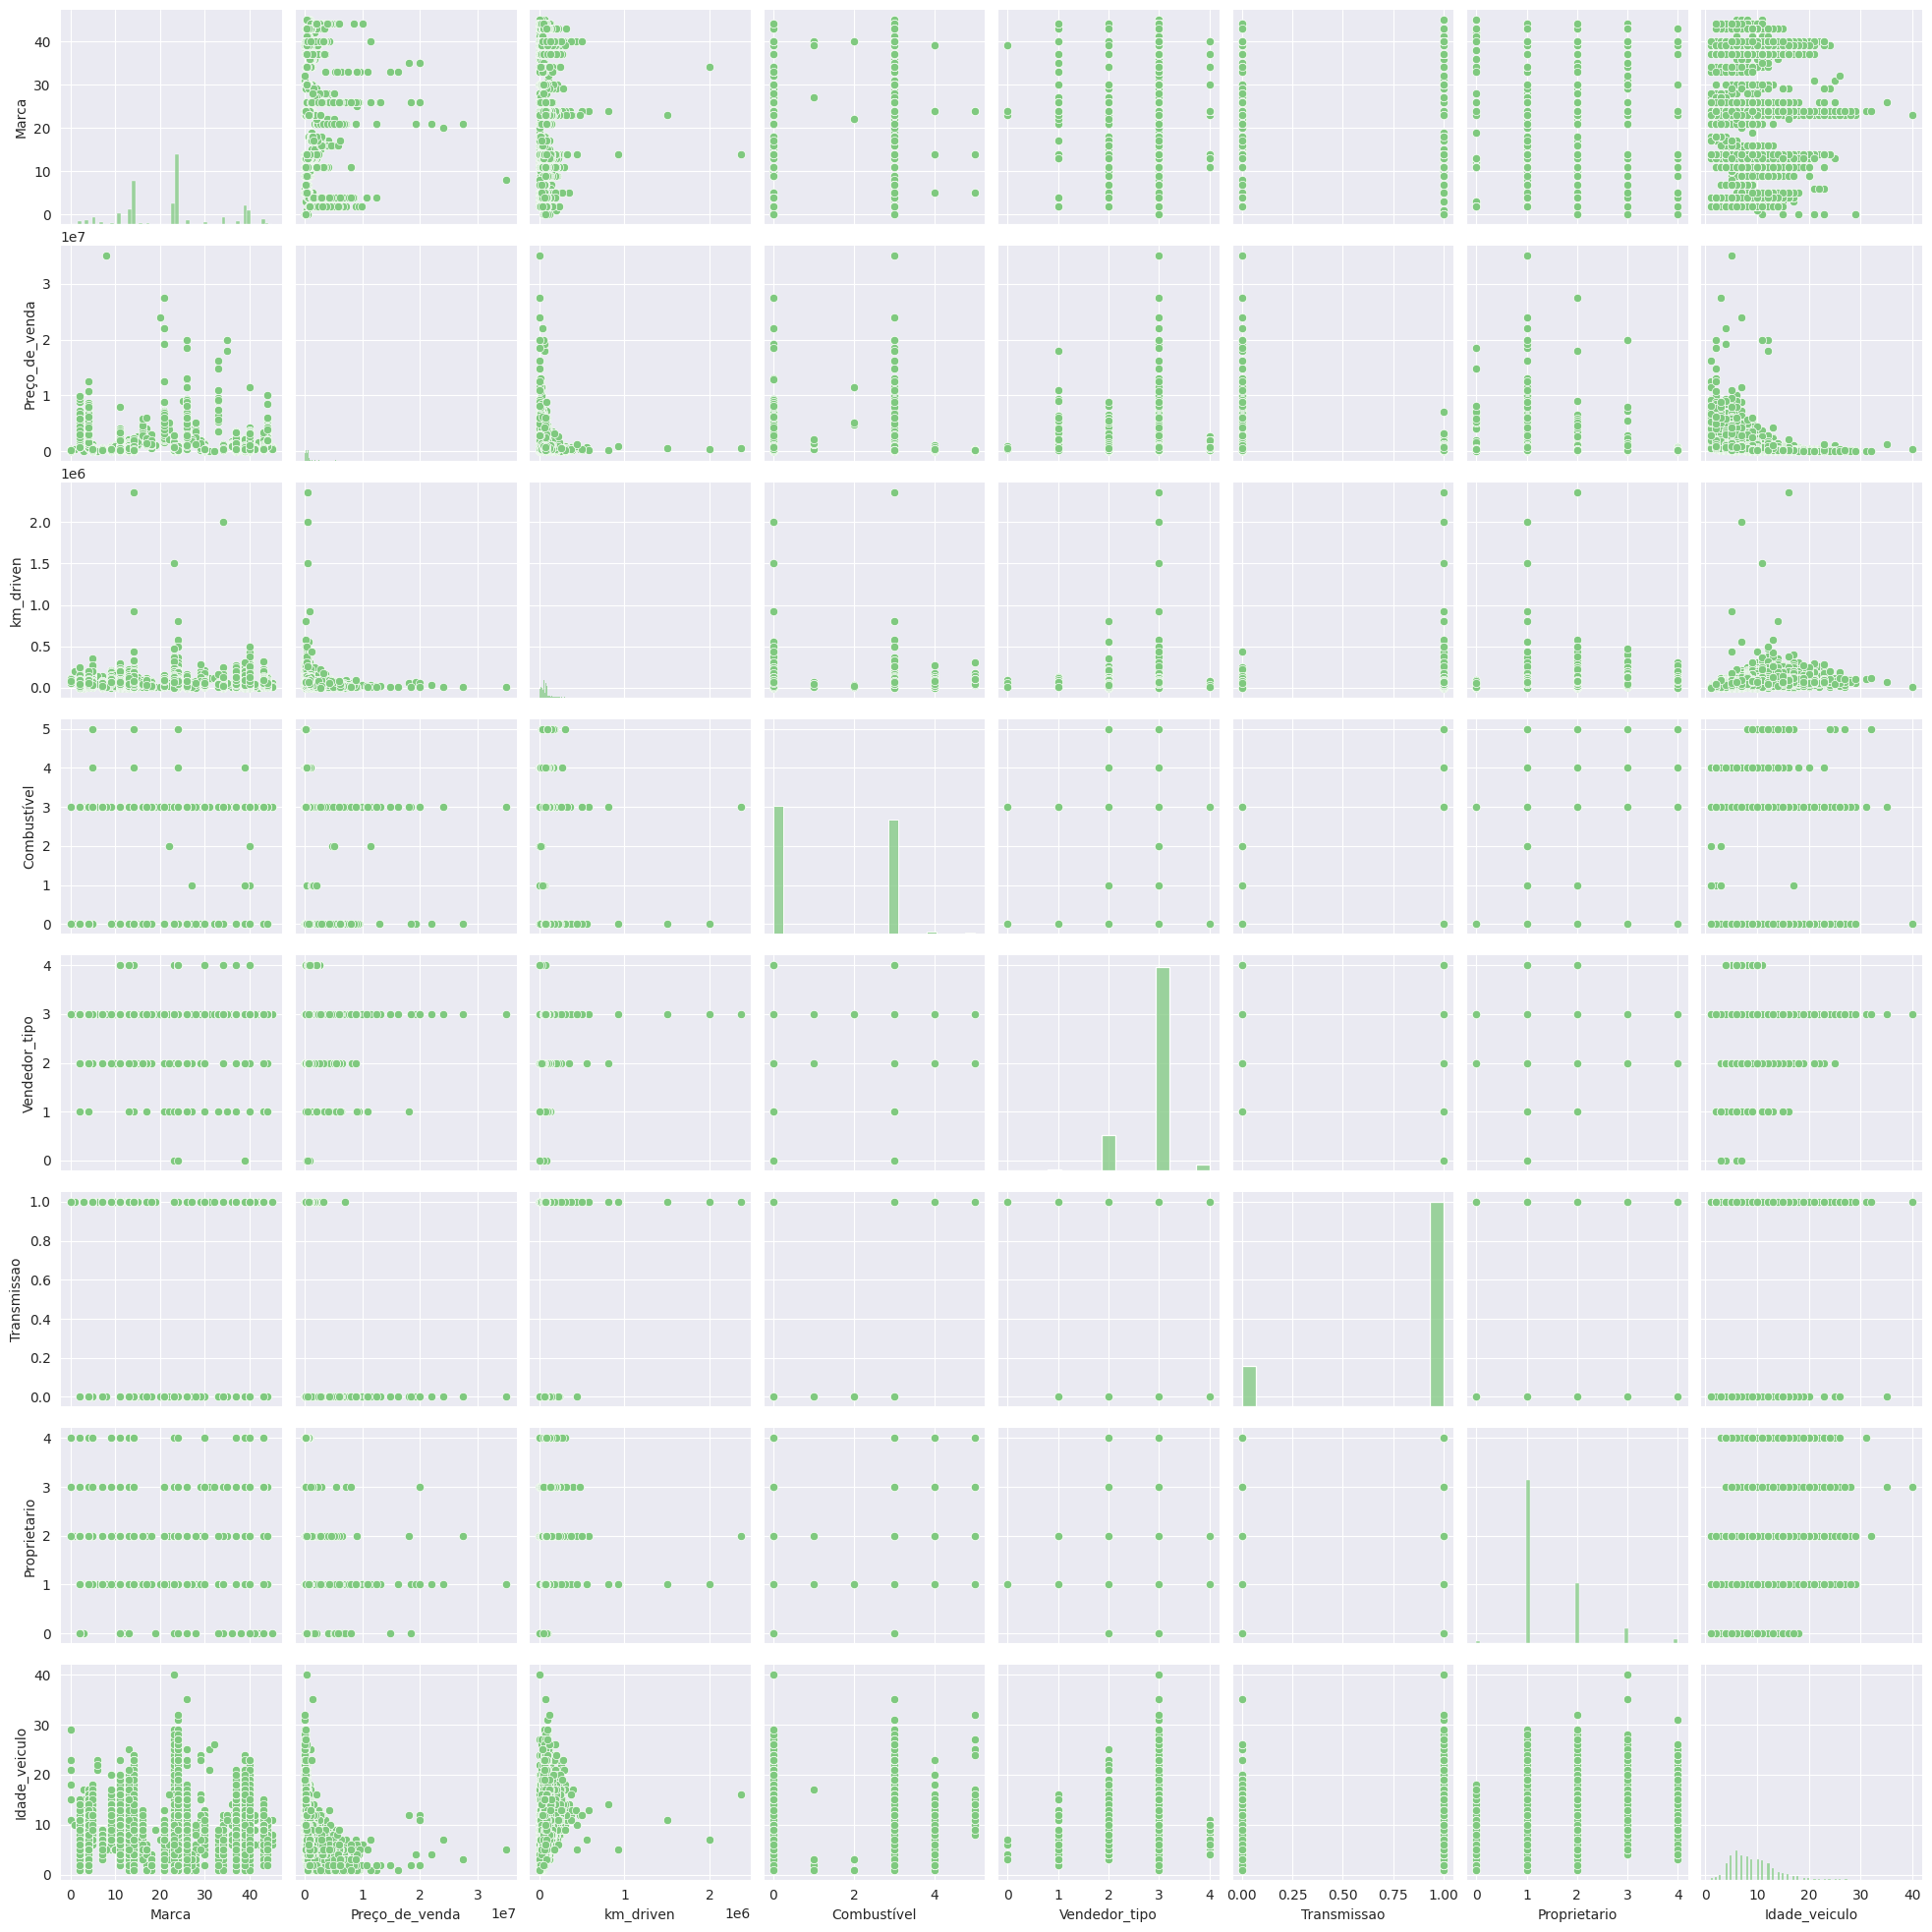

In [ ]:
#  utilizarei a biblioteca Seaborn para criar um gráfico chamado Pair plot, pois é uma maneira de visualizar a relação entre todas as combinações possíveis
sns.pairplot(df_car_cca)

<Axes: >

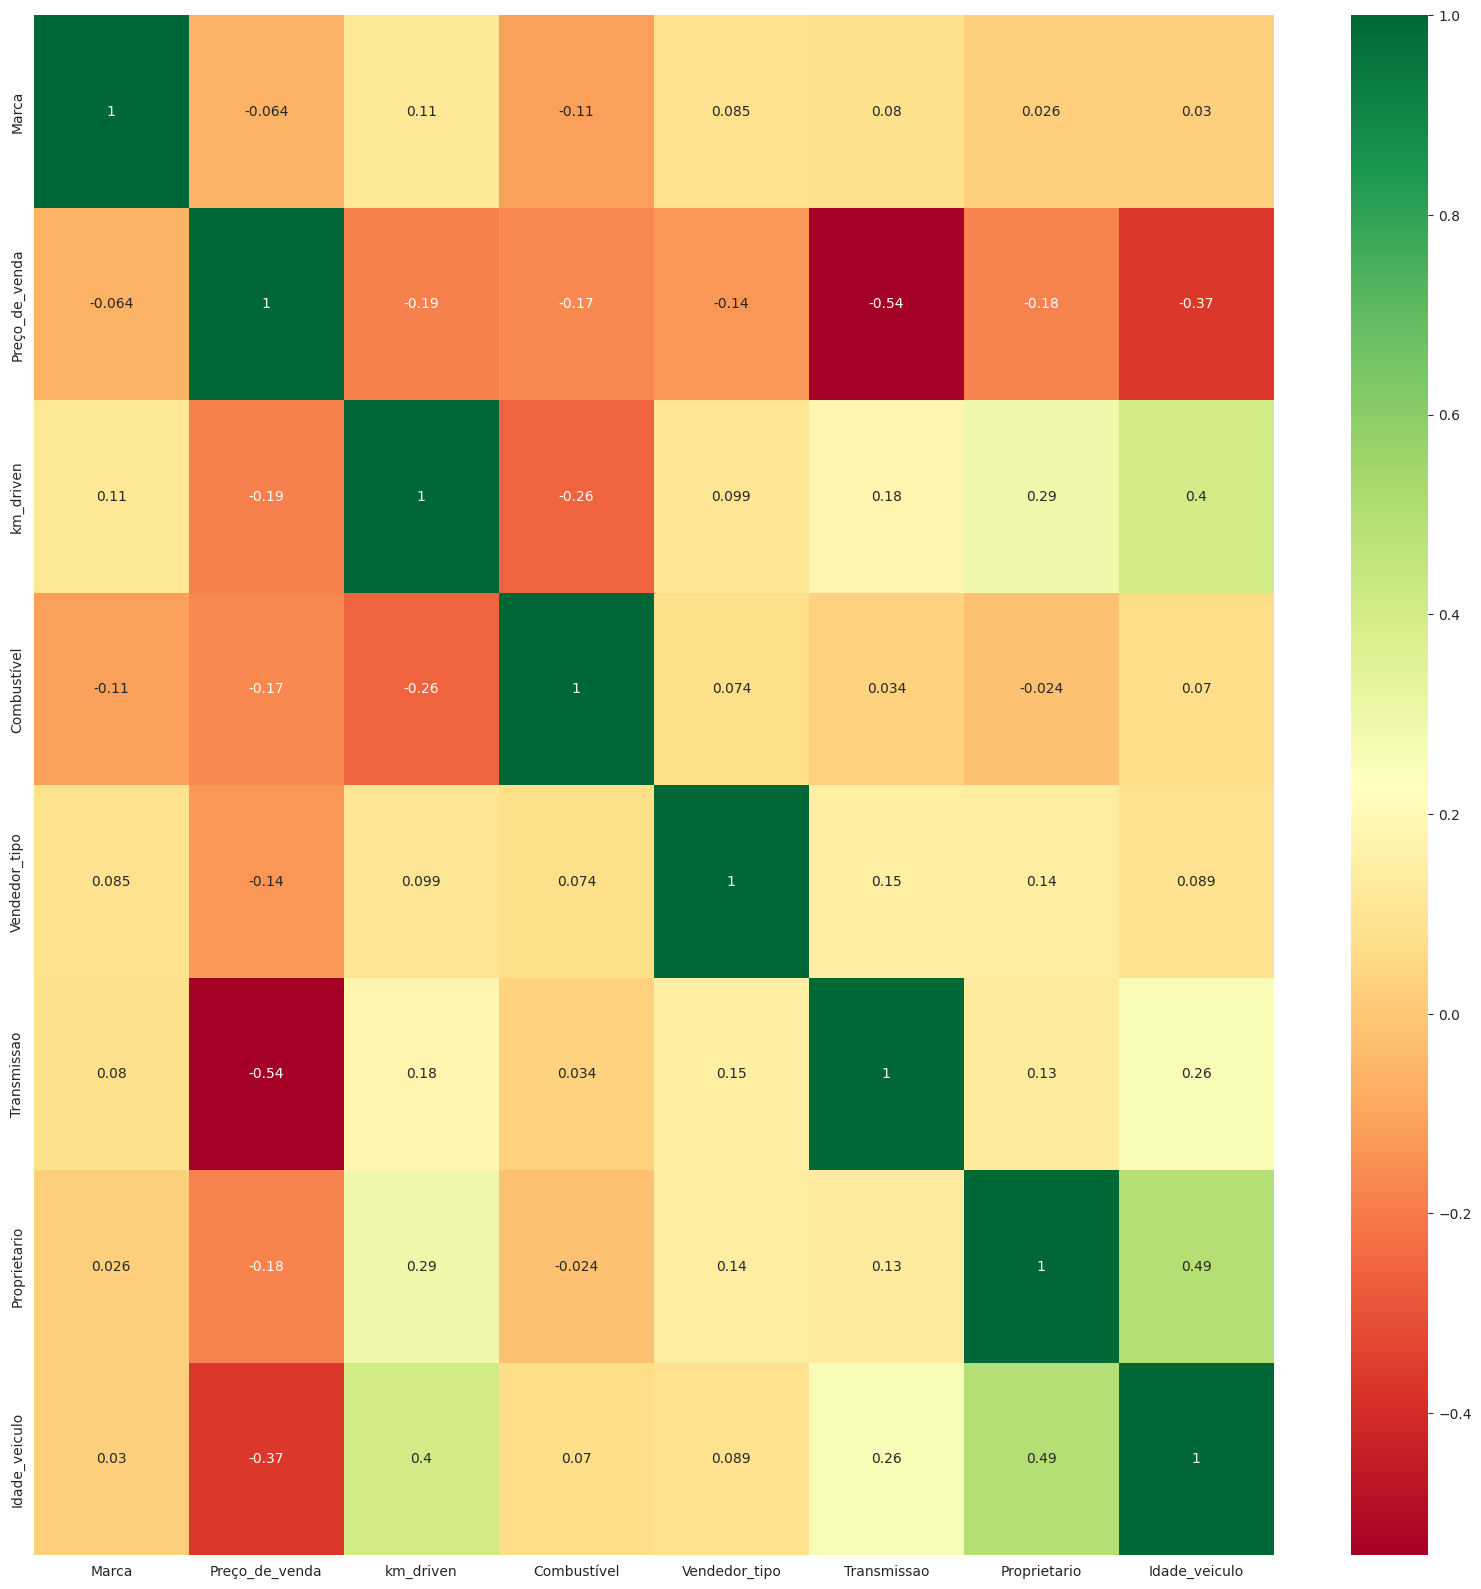

In [ ]:
# Calculando a matriz de correlação das colunas numéricas de final_dataset
corrmat = df_car_cca.corr()

# Definindo o tamanho da figura do mapa de calor
plt.figure(figsize=(20, 20))

# Plotando o mapa de calor com as correlações selecionadas (com anotações)
sns.heatmap(df_car_cca.corr(), annot=True, cmap="RdYlGn")

In [ ]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

<Axes: title={'center': 'Preço_de_venda'}, xlabel='Reais'>

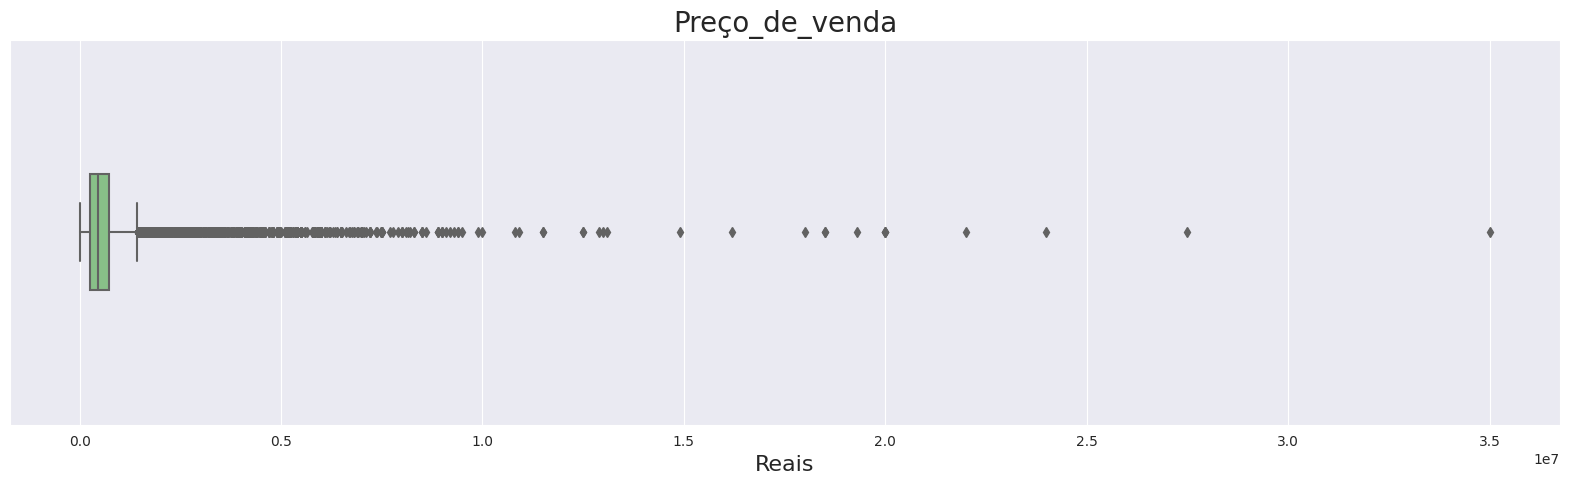

In [ ]:
ax = sns.boxplot(x=df_car_cca['Preço_de_venda'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço_de_venda', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço_de_venda (R$)', ylabel='Density'>

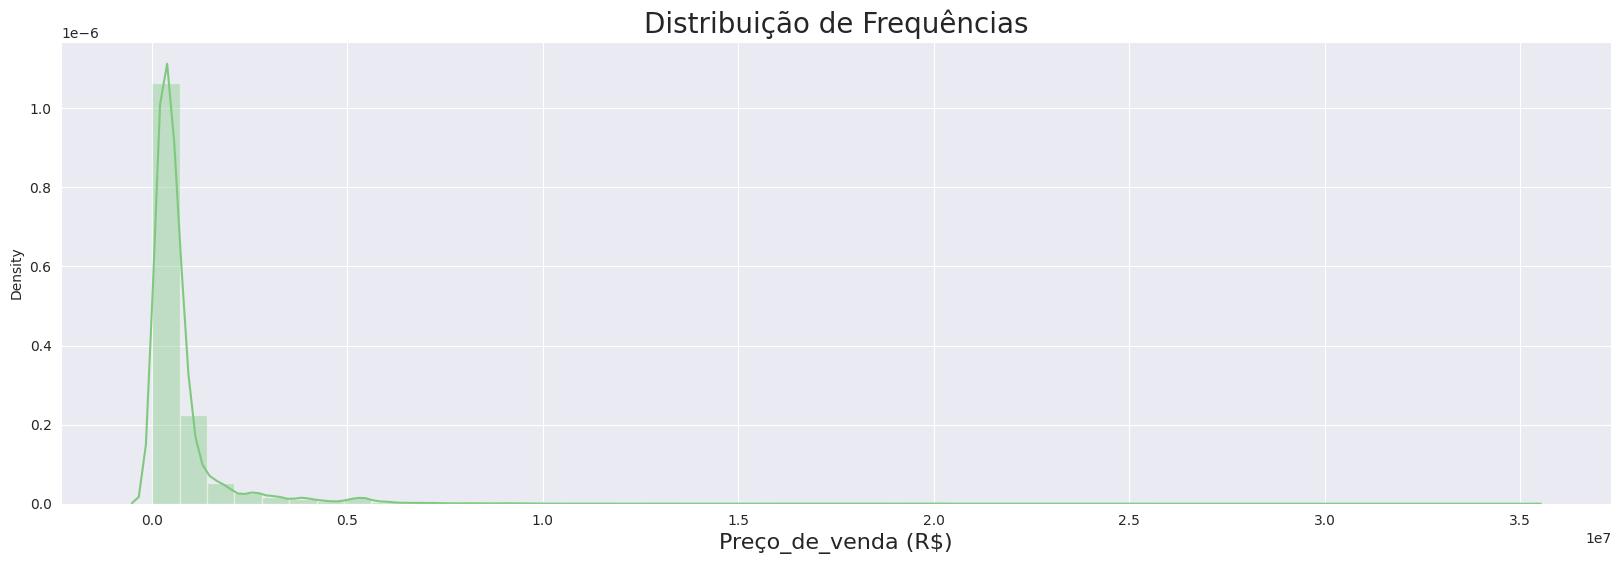

In [ ]:
ax = sns.distplot(df_car_cca['Preço_de_venda'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço_de_venda (R$)', fontsize=16)
ax

Marca	Preço_de_venda	km_driven	Combustível	Vendedor_tipo	Transmissao	Idade_veiculo	Proprietario

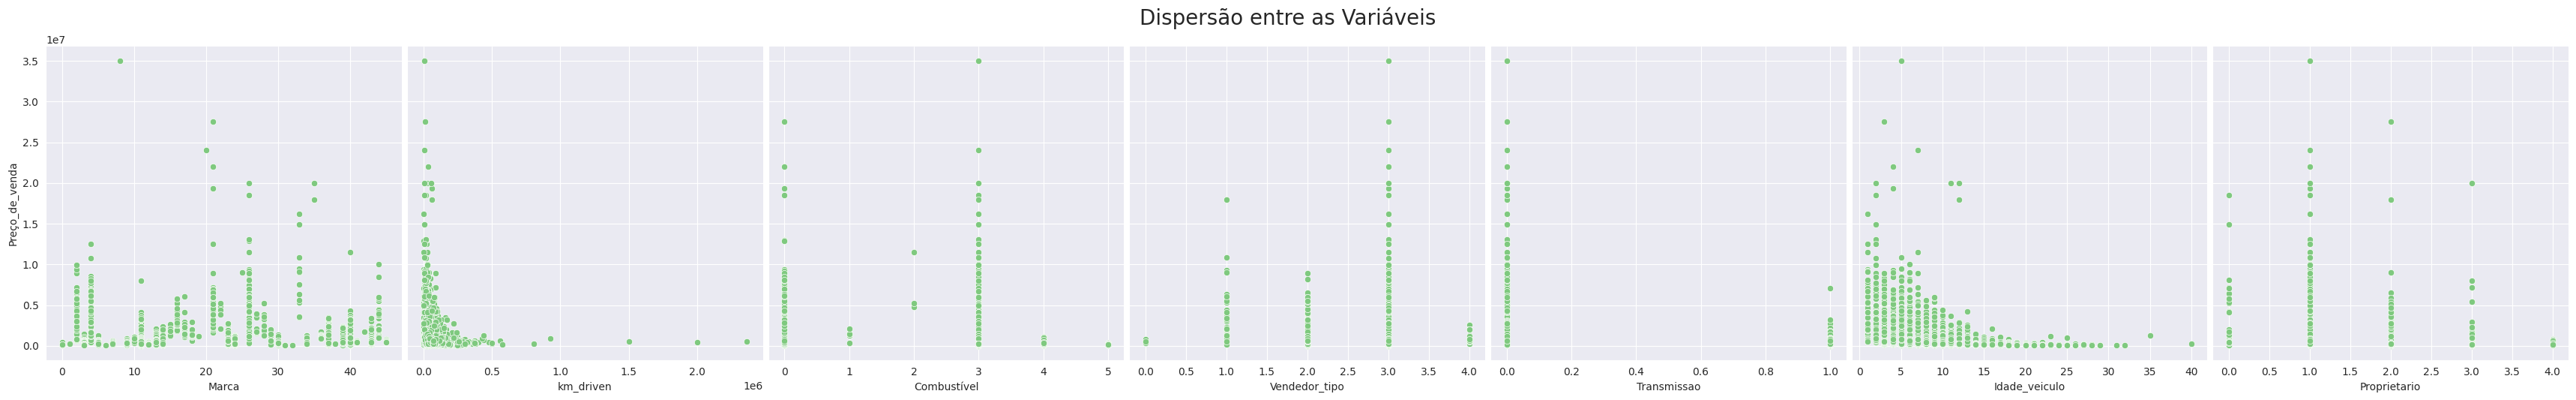

In [ ]:
ax = sns.pairplot(df_car_cca, y_vars='Preço_de_venda', x_vars=['Marca', 'km_driven', 'Combustível', 'Vendedor_tipo', 'Transmissao', 'Idade_veiculo', 'Proprietario'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

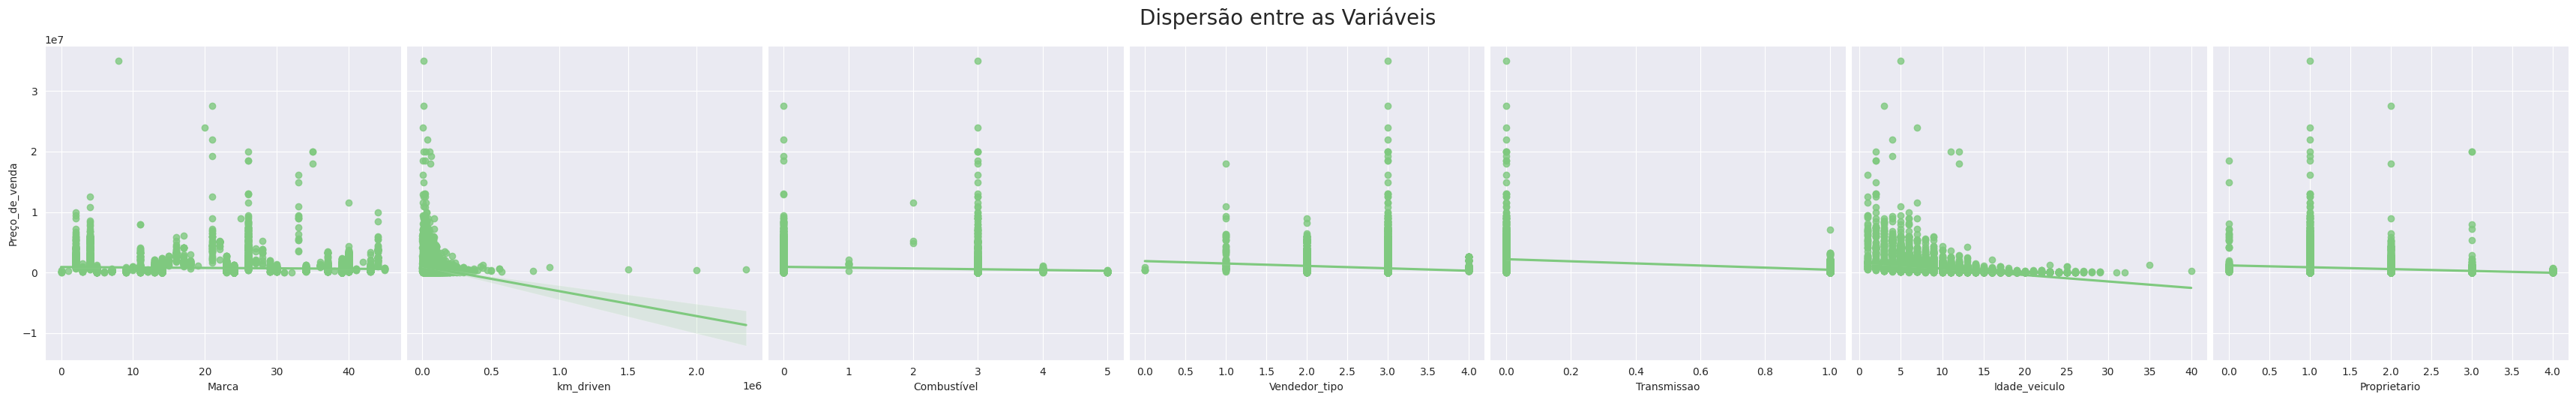

In [ ]:
ax = sns.pairplot(df_car_cca, y_vars='Preço_de_venda', x_vars=['Marca','km_driven', 'Combustível', 'Vendedor_tipo', 'Transmissao', 'Idade_veiculo', 'Proprietario'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
df_car_cca['log_Marca'] = np.log(df_car_cca['Marca']+1)
df_car_cca['log_Preço_de_venda'] = np.log(df_car_cca['Preço_de_venda'])
df_car_cca['log_km_driven'] = np.log(df_car_cca['km_driven']+1)
df_car_cca['log_Combustível'] = np.log(df_car_cca['Combustível']+1)
df_car_cca['log_Vendedor_tipo'] = np.log(df_car_cca['Vendedor_tipo']+1)
df_car_cca['log_Transmissao'] = np.log(df_car_cca['Transmissao']+1)
df_car_cca['log_Proprietario'] = np.log(df_car_cca['Proprietario']+1)
df_car_cca['log_Idade_veiculo'] = np.log(df_car_cca['Idade_veiculo']+1)



In [ ]:
df_car_cca.head()

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo,log_Marca,log_Preço_de_venda,log_km_driven,log_Combustível,log_Vendedor_tipo,log_Transmissao,log_Proprietario,log_Idade_veiculo
100,36,1750000.0,3000,3,3,1,0,7,3.611328,14.375126,8.006701,1.386719,1.386719,0.693359,0.0,2.079442
101,42,1700000.0,1400,3,3,1,0,6,3.761719,14.346139,7.244942,1.386719,1.386719,0.693359,0.0,1.945910
103,3,1450000.0,1200,3,3,1,0,6,1.386719,14.187074,7.090910,1.386719,1.386719,0.693359,0.0,1.945910
104,36,1350000.0,4100,3,3,1,0,6,3.611328,14.115615,8.318986,1.386719,1.386719,0.693359,0.0,1.945910
107,36,1250000.0,15000,3,3,1,0,10,3.611328,14.038654,9.615872,1.386719,1.386719,0.693359,0.0,2.397895


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

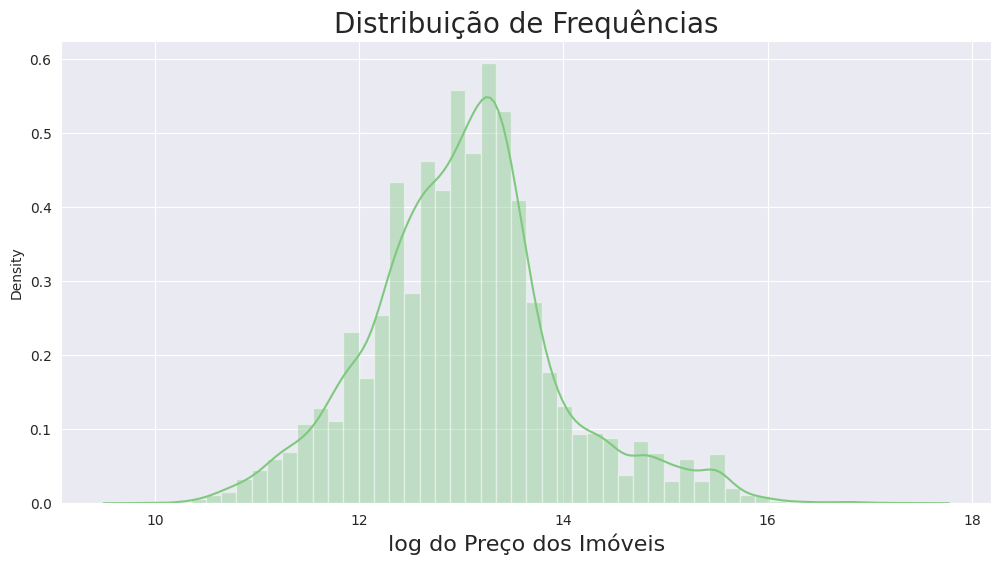

In [ ]:
ax = sns.distplot(df_car_cca['log_Preço_de_venda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

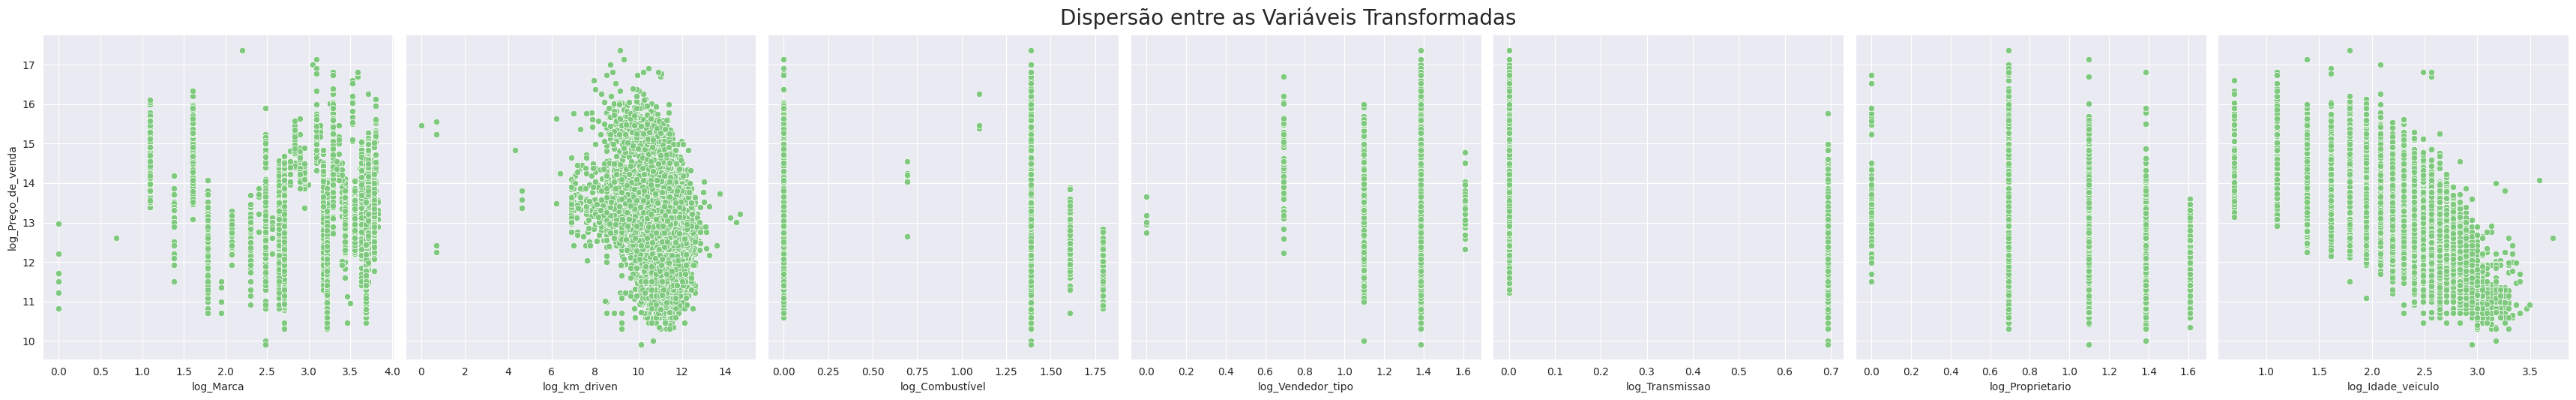

In [ ]:
ax = sns.pairplot(df_car_cca, y_vars='log_Preço_de_venda', x_vars=['log_Marca', 'log_km_driven', 'log_Combustível', 'log_Vendedor_tipo', 'log_Transmissao', 'log_Proprietario','log_Idade_veiculo'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

In [ ]:
corr = df_car_cca.corr()
corr.style.background_gradient(cmap='RdBu', axis=None)

,Marca,Preço_de_venda,km_driven,Combustível,Vendedor_tipo,Transmissao,Proprietario,Idade_veiculo,log_Marca,log_Preço_de_venda,log_km_driven,log_Combustível,log_Vendedor_tipo,log_Transmissao,log_Proprietario,log_Idade_veiculo
Marca,1.000000,-0.063572,0.110581,-0.114048,0.085438,0.079591,0.026044,0.029588,0.935125,-0.049646,0.086451,-0.114160,0.079472,0.079591,0.030533,0.034737
Preço_de_venda,-0.063572,1.000000,-0.185365,-0.167168,-0.136914,-0.542173,-0.177152,-0.365743,-0.142226,0.730674,-0.268296,-0.166037,-0.144825,-0.542173,-0.184637,-0.423569
km_driven,0.110581,-0.185365,1.000000,-0.256080,0.099146,0.177654,0.290712,0.403672,0.096200,-0.246256,0.732013,-0.260383,0.106823,0.177654,0.298751,0.437114
Combustível,-0.114048,-0.167168,-0.256080,1.000000,0.073909,0.033681,-0.023907,0.070127,-0.038858,-0.326174,-0.279452,0.998208,0.066944,0.033681,-0.036048,0.021225
Vendedor_tipo,0.085438,-0.136914,0.099146,0.073909,1.000000,0.145645,0.139160,0.088769,0.104311,-0.158470,0.115736,0.073503,0.991450,0.145645,0.140943,0.078829
Transmissao,0.079591,-0.542173,0.177654,0.033681,0.145645,1.000000,0.129493,0.258616,0.177225,-0.559415,0.241596,0.030477,0.157083,1.000000,0.129169,0.298717
Proprietario,0.026044,-0.177152,0.290712,-0.023907,0.139160,0.129493,1.000000,0.489668,0.032960,-0.367867,0.343423,-0.026326,0.147159,0.129493,0.985069,0.467462
Idade_veiculo,0.029588,-0.365743,0.403672,0.070127,0.088769,0.258616,0.489668,1.000000,0.034622,-0.698991,0.505792,0.067964,0.099422,0.258616,0.486578,0.959212
log_Marca,0.935125,-0.142226,0.096200,-0.038858,0.104311,0.177225,0.032960,0.034622,1.000000,-0.120492,0.081981,-0.039396,0.099266,0.177225,0.040544,0.036223
log_Preço_de_venda,-0.049646,0.730674,-0.246256,-0.326174,-0.158470,-0.559415,-0.367867,-0.698991,-0.120492,1.000000,-0.340755,-0.324505,-0.170494,-0.559415,-0.368759,-0.692556


In [ ]:
features_correlation = corr.loc['log_Preço_de_venda']
selected_columns = features_correlation[abs(features_correlation) > 0.3].index.tolist()
selected_columns
df_selected = df_car_cca[selected_columns]
print('Features com maiores correlações:', selected_columns)

Features com maiores correlações: ['Preço_de_venda', 'Combustível', 'Transmissao', 'Proprietario', 'Idade_veiculo', 'log_Preço_de_venda', 'log_km_driven', 'log_Combustível', 'log_Transmissao', 'log_Proprietario', 'log_Idade_veiculo']


método dos Mínimos Quadrados Ordinários.

In [ ]:
df_selected.head()

,Preço_de_venda,Combustível,Transmissao,Proprietario,Idade_veiculo,log_Preço_de_venda,log_km_driven,log_Combustível,log_Transmissao,log_Proprietario,log_Idade_veiculo
100,1750000.0,3,1,0,7,14.375126,8.006701,1.386719,0.693359,0.0,2.079442
101,1700000.0,3,1,0,6,14.346139,7.244942,1.386719,0.693359,0.0,1.945910
103,1450000.0,3,1,0,6,14.187074,7.090910,1.386719,0.693359,0.0,1.945910
104,1350000.0,3,1,0,6,14.115615,8.318986,1.386719,0.693359,0.0,1.945910
107,1250000.0,3,1,0,10,14.038654,9.615872,1.386719,0.693359,0.0,2.397895


# 4-     Realizar a divisão adequada do conjunto de dados em dois subconjuntos: treinamento e testes, realizando a estratificação quando se tratar de problemas de classificação.

Marca	Preço_de_venda	km_driven	Combustível	Vendedor_tipo	Transmissao	Proprietario	Idade_veiculo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_selected['log_Preço_de_venda']

In [ ]:
X = df_car_cca[['log_Marca', 'log_km_driven', 'log_Combustível', 'log_Vendedor_tipo', 'log_Transmissao', 'log_Proprietario','log_Idade_veiculo']]

### Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 5-     Escolher pelo menos três algoritmos de classificação ou regressão, a depender do problema que se está resolvendo.

Foram escolhidos três modelos a fim de comparar suas performances, sendo eles:

Regressão Linear

Random Forest

Árvore de Decisão



# Regressão Linear
----------------------------
A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

## Importando a biblioteca statsmodels
https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
X_train_com_constante

,const,log_Marca,log_km_driven,log_Combustível,log_Vendedor_tipo,log_Transmissao,log_Proprietario,log_Idade_veiculo
8598,1.0,2.708984,11.289794,0.000000,1.386719,0.693359,1.098633,2.564949
7399,1.0,3.689453,11.002117,1.609375,1.386719,0.693359,1.098633,2.197225
3224,1.0,3.218750,10.308986,0.000000,1.386719,0.693359,0.693359,1.945910
9423,1.0,2.833984,9.105091,0.000000,1.098633,0.000000,0.693359,1.945910
2999,1.0,3.218750,11.695255,1.386719,1.386719,0.693359,0.693359,2.995732
...,...,...,...,...,...,...,...,...
5409,1.0,3.218750,11.695255,0.000000,1.386719,0.693359,1.098633,2.484907
13636,1.0,3.636719,10.950824,1.386719,1.386719,0.000000,1.098633,2.397895
5608,1.0,3.218750,10.043293,0.000000,1.386719,0.693359,0.693359,2.197225
1077,1.0,3.218750,10.736418,0.000000,1.386719,0.693359,0.693359,2.484907


In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## *4.2* Avaliando o Modelo Estimado

### Avaliando as estatísticas de teste do modelo

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:     log_Preço_de_venda   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3697.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:11:14   Log-Likelihood:                -7216.4
No. Observations:               10227   AIC:                         1.445e+04
Df Residuals:                   10219   BIC:                         1.451e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.3442      0.08

##Estimando o Modelo com os Dados de Treino

### Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

In [ ]:
#Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Coeficiente de Determinação - R²
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.717


In [ ]:
#Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"
y_previsto = modelo.predict(X_test)

In [ ]:
#Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.71


### Tratamento dos dados

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 1.3488754 , -0.79950817,  1.03014313, ..., -2.22550043,
        -0.59597522, -1.44801277],
       [ 0.33230494, -1.18487917,  1.03014313, ...,  0.44933714,
        -0.59597522, -1.01419887],
       [-0.70880342,  0.95158204,  1.03014313, ...,  0.44933714,
         1.00143969,  1.00185235],
       ...,
       [ 0.33230494,  0.54600685,  1.03014313, ...,  0.44933714,
        -0.59597522,  1.16601323],
       [ 0.33230494,  0.99914582, -0.95664069, ...,  0.44933714,
        -0.59597522, -0.64741443],
       [ 1.17711005, -0.67760787, -0.95664069, ...,  0.44933714,
        -0.59597522, -0.64741443]])

###Regressão Linear



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

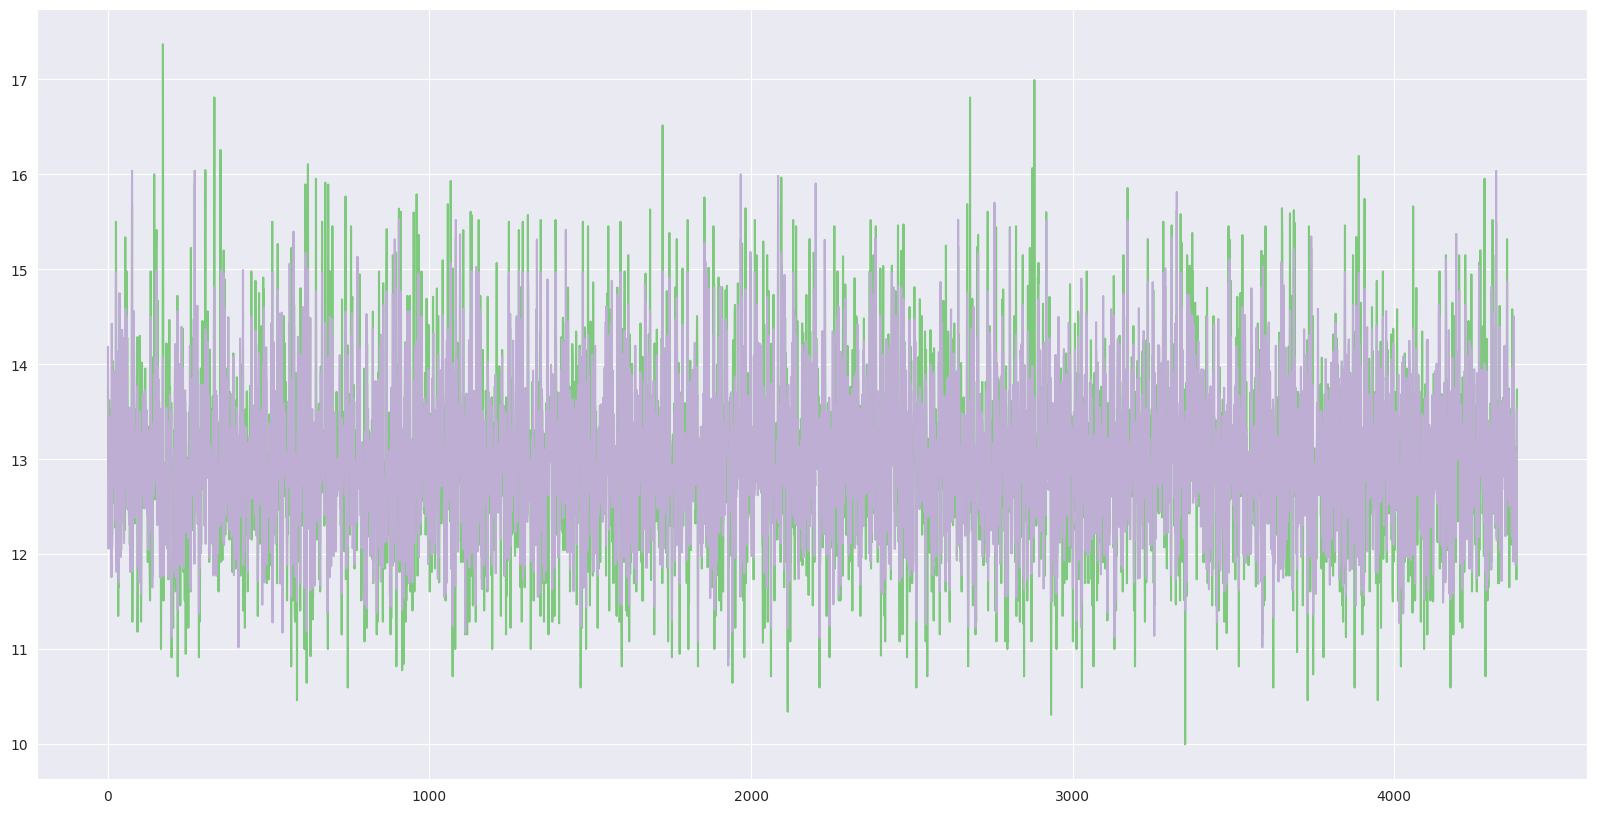

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test)), y_test)
ax.plot(range(len(y_pred)), y_pred)
plt.show()

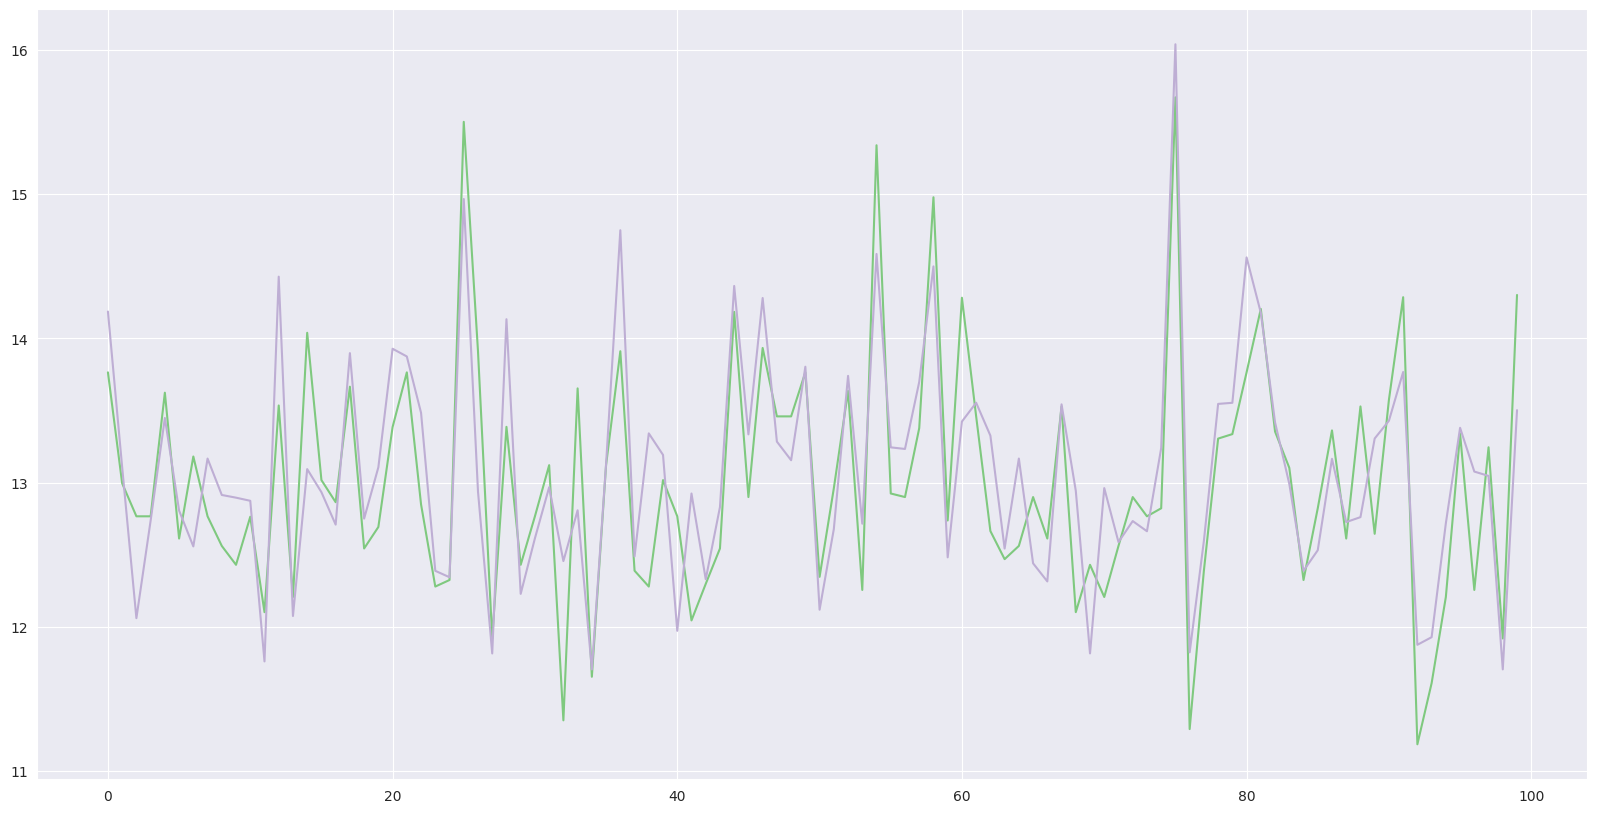

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(100), y_test[:100])
ax.plot(range(100), y_pred[:100])
plt.show()

-0.002977220550499145 0.4915721568139413 -0.4975265979149396


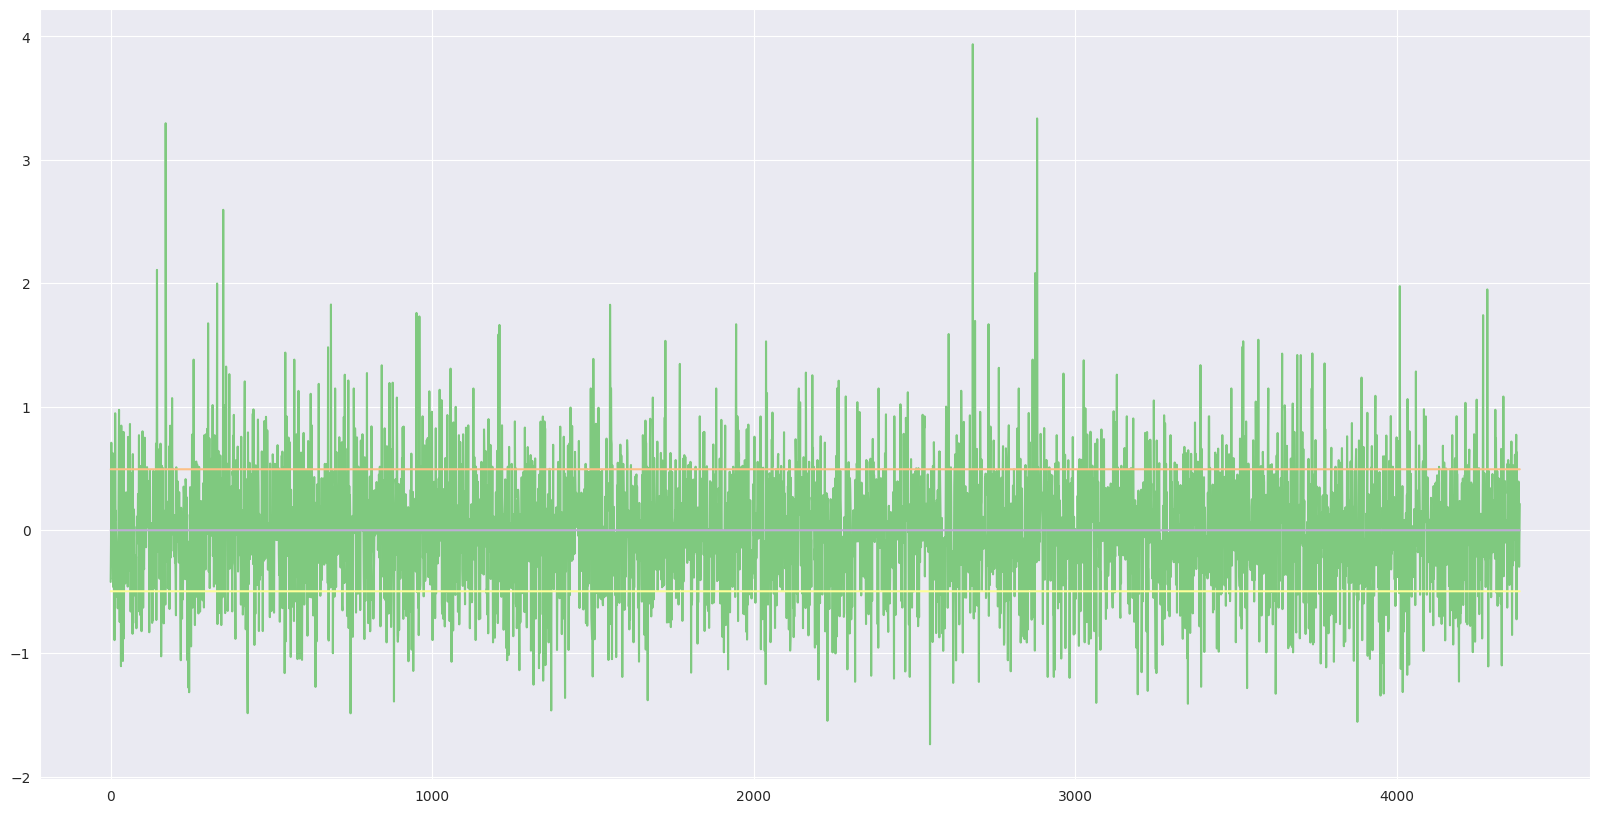

In [ ]:
error = y_test-y_pred
mean = np.mean((error))
std = np.std((error))

print(mean, mean+std, mean-std)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test)), (y_test-y_pred))
ax.plot(range(len(y_test)), [mean]*len(y_test))
ax.plot(range(len(y_test)), [mean+std]*len(y_test))
ax.plot(range(len(y_test)), [mean-std]*len(y_test))
plt.show()

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE =', rmse)
print('R2 =', r2)

RMSE = 0.49455833881733513
R2 = 0.7102283267602363


In [ ]:
r2_cross_val = cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean()

print('R2 =', r2_cross_val)

R2 = 0.716008260886978



---------------------
# Árvore de Decisão

---------------------------


### Importando DecisionTreeRegressor da biblioteca scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Treino com Árvore de Decisão

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Criar o modelo de regressão de árvore de decisão
regressor = DecisionTreeRegressor()

# Treinar o modelo usando os dados de treinamento
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
# Avaliar o desempenho do modelo usando métricas de erro e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.24458795049376206
R-squared (R²): 0.7102283267602363


--------------
# Random Forest
---------------------------------------------------------------------------------------------------------------------------------------------------------------

### Importando RandomForestRegressor da biblioteca scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Criar o modelo de regressão com a Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Treinar o modelo com os dados de treinamento
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Fazer previsões com o modelo usando os dados de teste
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.14096856770693603
R-squared (R²): 0.8329897378174663


## Criando Tabela para comparação dos Modelos

In [ ]:
models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor()
}

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Modelo': model_name, 'MSE': mse, 'R²': r2})

# Criar a tabela com os resultados
df_results = pd.DataFrame(results)

print(df_results)


                    Modelo       MSE        R²
0  Random Forest Regressor  0.140969  0.832990
1        Linear Regression  0.244588  0.710228
2        Árvore de Decisão  0.206080  0.755849


### O modelo que teve um desempenho muito bom, com R² 83,29% foi Random Forest Regressão, com Erro quadrático Médio de 14,09% é uma métrica amplamente utilizada para avaliar o desempenho de modelos de regressão.

# 6-     Dividir o conjunto de treinamento em dois subconjuntos: treinamento e validação, para fazer otimização de hiperparâmetros.


In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from skopt.space import Integer,Real,Categorical
from skopt.utils import use_named_args
from skopt import gbrt_minimize

In [ ]:
model = GradientBoostingRegressor()

params = [Categorical(['squared_error','absolute_error','huber','quantile'], name='loss'),
          Real(low=1e-4,high=0.5, prior='log-uniform', name='learning_rate'),
          Integer(low=10, high=200, prior='uniform', name='n_estimators'),
          Real(low=1e-2, high=1.0, prior='log-uniform', name='subsample')]

In [ ]:
@use_named_args(params)
def objective(**params):

    model.set_params(**params)
    mean_score = cross_val_score(model, X_train,y_train,
                                 cv=ShuffleSplit(n_splits=5, test_size=0.3, random_state=42),
                                 scoring='neg_mean_squared_error', n_jobs=-1).mean()

    return -mean_score

# 7-      Utilizar Otimização bayesiana para otimizar os hiperparâmetros.


In [ ]:
results = gbrt_minimize(func=objective,
              dimensions=params,
              n_calls=200,
              acq_func='EI',
              n_jobs=-1)

In [ ]:
print('Cross Val RMSE: %.2f' % np.sqrt(results.fun))
print('Train_std: %.2f' %y_train.std())

Cross Val RMSE: 0.35
Train_std: 0.92


In [ ]:
print("""
===== Best Hyperparameters =====
loss:'%s'
learning_rate:%.4f
n_estimators:%d
subsample:%.2f
""" %(results.x[0],
      results.x[1],
      results.x[2],
      results.x[3]))


===== Best Hyperparameters =====
loss:'huber'
learning_rate:0.3633
n_estimators:171
subsample:0.94



In [ ]:
best_params = {'loss': results.x[0],
               'learning_rate': results.x[1],
               'n_estimators': results.x[2],
               'subsample': results.x[3]}
model.set_params(**best_params)
model.fit(X_train,y_train)
print('Test RMSE:%.2f' % mean_squared_error(y_test, model.predict(X_test), squared=False))

Test RMSE:0.36


# 8-     Comparar o erro/acurácia do modelos gerados com e sem a otimização de hiperparâmetros.

###A acurácia não é apropriada para modelos de regressão, Portanto, ao avaliar um modelo de regressão, é aconselhável utilizar métricas como EQM, R² e REQM para obter uma visão mais precisa do desempenho do modelo.

*   Erro Quadrático Médio -EQM
*   Raíz do Erro Quadrático Médio - REQM
*   Coeficiente de Determinação - R²



obs: dados do modelo Linear Regression

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,0.24
REQM,0.49
R²,0.71


----------
**Conclusões: **

1.   **Random Forest Regressor**: Este modelo obteve o menor valor de Mean Squared Error (MSE) entre os três modelos testados, com um valor de 0.140969. Isso indica que suas previsões têm a menor dispersão em relação aos valores reais, tornando-o o modelo com melhor ajuste aos dados de teste em relação aos outros dois.
2.   **Árvore de Decisão**: A Árvore de Decisão obteve um valor de MSE de 0.206080, que está entre o valor do Random Forest Regressor e o valor do Linear Regression. Isso sugere que suas previsões têm uma dispersão intermediária em relação aos valores reais.

3. **Linear Regression:** O modelo de regressão linear teve o maior valor de MSE, com um valor de 0.244588. Isso indica que suas previsões têm a maior dispersão em relação aos valores reais em comparação com os outros modelos testados.

R² (Coeficiente de Determinação): O R² é uma medida da proporção da variabilidade total da variável dependente que é explicada pelo modelo. Nesse sentido, o ***Random Forest Regressor obteve o maior valor de R² (0.832990)***, seguido pela Árvore de Decisão (0.755849) e, por último, o Linear Regression (0.710228). Isso sugere que o Random Forest Regressor é o modelo que explica a maior parte da variação nos dados de teste, enquanto o Linear Regression é o modelo com menor capacidade de explicar a variação.

-----

Em resumo, com base nas métricas MSE e R², o **Random Forest Regressor** parece ser o modelo mais adequado para esse problema de regressão, uma vez que apresentou menor erro médio quadrático e maior capacidade de explicar a variação nos dados. No entanto, é importante considerar outros fatores, como a complexidade do modelo, o tempo de treinamento e a interpretabilidade, ao escolher o modelo final para um problema específico.


## Agradecimento pelo aprendizado , Prof. Antônio!!!! ✅::::: :